In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import os
jax.devices()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[CpuDevice(id=0)]

In [3]:
import pandas as pd
from src import ComputationalHypergraphDiscovery as CHD
#from ComputationalHypergraphDiscovery.Modes import LinearMode, QuadraticMode, GaussianMode
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [4]:
from src.ComputationalHypergraphDiscovery import helper_functions as hf

# Linear FPUT model

In [5]:
df=pd.read_csv('./examples/FPUT_linear.csv')
df

$X_{0}$   $X_{1}$   $X_{2}$   $X_{3}$   $X_{4}$   $X_{5}$   $X_{6}$  \
0    0.200543 -0.268028  0.483134 -0.105517 -0.074423  0.334300 -0.187482   
1   -0.017160  0.152926  0.149011 -0.115220  0.002534 -0.062572 -0.163796   
2    0.106949 -0.202711  0.473624 -0.130464 -0.052804  0.383457 -0.222962   
3   -0.004821  0.306659 -0.309887  0.047212 -0.022266 -0.016344 -0.012491   
4   -0.124585  0.056731 -0.379151  0.143918  0.150544 -0.173367  0.176687   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.146389  0.006213  0.403906 -0.256289  0.257063 -0.204374  0.420246   
996  0.198881  0.128679 -0.316517  0.254229 -0.527290  0.141267 -0.251007   
997 -0.192739 -0.083689  0.311481 -0.068822 -0.134921 -0.426854  0.014337   
998 -0.154976  0.074445 -0.066226 -0.182642  0.284772  0.080398 -0.274946   
999 -0.041025  0.204624  0.053900  0.010933 -0.083813  0.274687 -0.126738   

      $X_{7}$   $X_{8}$   $X_{9}$  ...  $\ddot{X}_{0}$  $\ddot{X}_{1}$  \
0    0.029494 -0.138106 -0.001547  ...      -54.198255       98.798327   
1   -0.093034 -0.052793  0.110310  ...       15.166878      -14.094042   
2   -0.014684 -0.105294 -0.017773  ...      -33.745320       79.865593   
3   -0.053466  0.451172 -0.311484  ...       25.620459      -75.170161   
4    0.145475 -0.041774 -0.064768  ...       24.778037      -49.993023   
..        ...       ...       ...  ...             ...             ...   
995 -0.265031  0.169803  0.006959  ...      -23.211749       43.567359   
996 -0.111275 -0.334562  0.488099  ...      -21.795657      -30.374574   
997 -0.195667  0.027542 -0.031051  ...       24.444986       23.175640   
998  0.027231  0.325166 -0.052136  ...       31.136173      -29.977377   
999  0.214071  0.103440  0.149630  ...       23.220560      -32.106194   

     $\ddot{X}_{2}$  $\ddot{X}_{3}$  $\ddot{X}_{4}$  $\ddot{X}_{5}$  \
0       -108.524794       50.199359       30.587862      -75.370803   
1        -21.085597       30.940767      -14.811615       -2.925602   
2       -103.714248       55.221631       29.046586      -84.456997   
3         78.865289      -34.552810        6.107416       -0.167508   
4         77.674934      -41.831810      -26.773515       54.591217   
..              ...             ...             ...             ...   
995      -85.688913       95.057294      -78.957921       87.970667   
996       82.291305     -109.533434      117.456120      -85.927293   
997      -62.813320       25.450580      -18.292596       59.383076   
998        1.964557       47.290251      -54.414828      -12.228503   
999        8.728298       -4.194025       36.712869      -61.553959   

     $\ddot{X}_{6}$  $\ddot{X}_{7}$  $\ddot{X}_{8}$  $\ddot{X}_{9}$  
0         59.839341      -31.150640       24.636881      -10.935974  
1         13.930864       -2.472201        9.951854      -22.146463  
2         65.990359      -24.209833       14.428580       -5.649607  
3         -3.631148       44.194637     -102.650720       87.005270  
4        -30.882615      -12.639003       13.304734        7.108632  
..              ...             ...             ...             ...  
995     -106.101685       90.728989      -48.411955       12.626741  
996       43.092495      -29.404581       84.721841     -106.171611  
997      -52.746789       35.090210      -22.825899        7.261119  
998       53.259083       -0.343514      -54.694186       34.784423  
999       60.120972      -36.566586       12.702438      -15.861391  

[1000 rows x 30 columns]

In [29]:

graph_discovery=CHD.GraphDiscovery.from_dataframe(df,normalize=True,kernels=[CHD.Modes.GaussianMode(l=1)],gamma_min=1e-9)

In [27]:
graph_discovery.kernels[0].exps.shape

(1000, 1000, 30)

In [30]:
graph_discovery.kernels[0].individual_influence(graph_discovery.X,graph_discovery.X,which_dim,which_dim_only)

Array([[2.68435575e+08, 8.93066475e+03, 1.04170448e+08, ...,
        3.13431708e+04, 3.85239059e+03, 2.08800641e+04],
       [8.93066475e+03, 2.68435483e+08, 3.17840330e+04, ...,
        4.89541102e+05, 3.15623186e+05, 2.00711447e+05],
       [1.04170448e+08, 3.17840330e+04, 2.68435524e+08, ...,
        7.09731377e+04, 5.54798709e+03, 4.44559026e+04],
       ...,
       [3.13431708e+04, 4.89541102e+05, 7.09731377e+04, ...,
        2.68435470e+08, 1.53911080e+05, 2.44282559e+03],
       [3.85239059e+03, 3.15623186e+05, 5.54798709e+03, ...,
        1.53911080e+05, 2.68435466e+08, 2.52856118e+04],
       [2.08800641e+04, 2.00711447e+05, 4.44559026e+04, ...,
        2.44282559e+03, 2.52856118e+04, 2.68435530e+08]], dtype=float64)

In [23]:
which_dim=jax.numpy.array([False]+29*[True])
which_dim_only=jax.numpy.array([False,True]+28*[False])
def ki(x,y):
    return jax.numpy.exp(-(x-y)**2/2)

exps=jax.vmap(jax.vmap(ki,in_axes=(None,0)), in_axes=(0,None))(graph_discovery.X,graph_discovery.X)
jax.numpy.prod(1 - which_dim_only[None,None,:] + which_dim[None,None,:] * exps,axis=-1)

Array([[2.68435456e+08, 8.93349774e+03, 1.04170363e+08, ...,
        3.13390488e+04, 3.84973842e+03, 2.09077513e+04],
       [8.93349774e+03, 2.68435456e+08, 3.17915108e+04, ...,
        4.89538281e+05, 3.15623208e+05, 2.00710973e+05],
       [1.04170363e+08, 3.17915108e+04, 2.68435456e+08, ...,
        7.09714944e+04, 5.54736320e+03, 4.44778893e+04],
       ...,
       [3.13390488e+04, 4.89538281e+05, 7.09714944e+04, ...,
        2.68435456e+08, 1.53916416e+05, 2.42726853e+03],
       [3.84973842e+03, 3.15623208e+05, 5.54736320e+03, ...,
        1.53916416e+05, 2.68435456e+08, 2.52968249e+04],
       [2.09077513e+04, 2.00710973e+05, 4.44778893e+04, ...,
        2.42726853e+03, 2.52968249e+04, 2.68435456e+08]], dtype=float64)

before kernel performance
gaussian
[[5.36872307e+08 7.40717382e+04 2.13445622e+08 2.39653134e+04
  1.97001956e+04 2.09009613e+06 1.21549306e+04 8.01483161e+04
  1.16613778e+05 2.44180148e+04]
 [7.40717382e+04 5.36871602e+08 1.63079276e+05 1.19870560e+05
  5.18972462e+05 4.32892507e+05 9.15473518e+05 7.89502915e+05
  2.05422017e+08 1.06612575e+05]
 [2.13445622e+08 1.63079276e+05 5.36872266e+08 1.13162500e+04
  5.05143461e+04 1.07067756e+06 3.97140471e+04 3.51646300e+04
  2.39911911e+05 1.24258874e+04]
 [2.39653134e+04 1.19870560e+05 1.13162500e+04 5.36872354e+08
  1.30351921e+05 9.20320782e+04 3.22402115e+05 2.43086874e+05
  4.66622572e+04 2.55307023e+06]
 [1.97001956e+04 5.18972462e+05 5.05143461e+04 1.30351921e+05
  5.36871841e+08 1.08698741e+04 5.10571829e+06 1.25091549e+05
  2.71924337e+05 1.14076525e+06]
 [2.09009613e+06 4.32892507e+05 1.07067756e+06 9.20320782e+04
  1.08698741e+04 5.36871858e+08 4.39300403e+04 5.80320784e+05
  1.01795918e+06 4.18041949e+04]
 [1.21549306e+04 9.1547

Finding ancestors with kernel [gaussian]:   0%|          | 0/28 [00:00<?, ?it/s]

inside activation mat [[5.36870912e+08 7.40715524e+04 2.13444389e+08 2.36457035e+04
  1.92875427e+04 2.08990633e+06 1.20157821e+04 8.00807311e+04
  1.16575629e+05 2.41090870e+04]
 [7.40715524e+04 5.36870912e+08 1.63054842e+05 1.19869971e+05
  5.18933019e+05 4.32850619e+05 9.15328911e+05 7.89472520e+05
  2.05421333e+08 1.06548469e+05]
 [2.13444389e+08 1.63054842e+05 5.36870912e+08 1.10020612e+04
  5.03032537e+04 1.07062031e+06 3.96611630e+04 3.50314372e+04
  2.39819540e+05 1.18957908e+04]
 [2.36457035e+04 1.19869971e+05 1.10020612e+04 5.36870912e+08
  1.30329058e+05 9.17880063e+04 3.22369913e+05 2.43047216e+05
  4.65827471e+04 2.55280154e+06]
 [1.92875427e+04 5.18933019e+05 5.03032537e+04 1.30329058e+05
  5.36870912e+08 1.06844867e+04 5.10532455e+06 1.25077107e+05
  2.71915700e+05 1.14074973e+06]
 [2.08990633e+06 4.32850619e+05 1.07062031e+06 9.17880063e+04
  1.06844867e+04 5.36870912e+08 4.38910845e+04 5.80284208e+05
  1.01781863e+06 4.18021632e+04]
 [1.20157821e+04 9.15328911e+05 3.96

Finding ancestors with kernel [gaussian]:   4%|▎         | 1/28 [00:10<04:54, 10.92s/it]

yb [-2.05402017e-09 -8.47401701e-11 -5.37859327e-10 -2.46251956e-10
  1.39175445e-09  3.49187069e-10  1.16967880e-09  2.34633407e-09
  6.52320103e-10  1.96391004e-09] 
 other sample [ 2.51138797e-09 -9.33934633e-10  1.33562121e-09 -3.76151809e-09
 -2.82003509e-10  1.68211963e-09 -2.11874051e-09 -4.21156741e-09
 -1.54782177e-09  1.57511186e-12]
activations [2.         0.41152393 0.40583425 0.40472609 0.405887   0.40526753
 0.40566155 0.40495914 0.40460353 0.40389758 0.40262106 0.40401141
 0.40309252 0.40316994 0.40305469 0.40314437 0.40452004 0.40379836
 0.40246058 0.4010637  0.46453145 0.41832913 0.40960874 0.40848014
 0.40860747 0.40753364 0.40824416 0.40737901 0.40723265 0.40555839] 
 other sample [0.41227071 2.         0.41047935 0.40579164 0.40536345 0.40431328
 0.40492661 0.40404495 0.40392721 0.40450816 0.40320693 0.402237
 0.40358339 0.4041777  0.40521319 0.40343733 0.40444954 0.40279615
 0.4027335  0.40219291 0.4175105  0.45016147 0.41765299 0.40967023
 0.40849708 0.40783806 0.

Finding ancestors with kernel [gaussian]:   7%|▋         | 2/28 [00:11<02:13,  5.12s/it]

yb [-3.95871525e-09 -3.18542522e-10 -1.11548093e-09 -6.90620550e-10
  2.70929175e-09  6.98211067e-10  2.03574122e-09  4.41600540e-09
  1.09185901e-09  3.81073362e-09] 
 other sample [ 4.53555373e-09 -1.66254610e-09  2.52599572e-09 -7.13193679e-09
 -4.53318224e-10  3.04902256e-09 -3.98674903e-09 -7.89566815e-09
 -3.02343053e-09  2.47792926e-10]
activations [2.         0.40985908 0.40274901 0.40157163 0.40298981 0.402259
 0.4026459  0.40188581 0.40151501 0.40064336 0.39920952 0.40070503
 0.39953181 0.39970019 0.39966215 0.39969847 0.40117489 0.40032584
 0.39803163 2.         0.4711858  0.41719235 0.40717573 0.4058816
 0.40607977 0.40489368 0.4056454  0.4046912  0.40448287 0.40252796] 
 other sample [0.41060695 2.         0.4084192  0.40270447 0.40214194 0.40111197
 0.40176248 0.40069615 0.40056871 0.40124054 0.39987273 0.39871203
 0.40024347 0.40099287 0.40193162 0.39994213 0.40098318 0.3994
 0.39826768 2.         0.41598118 0.45396297 0.41645171 0.40718834
 0.40577736 0.40508085 0.40445

Finding ancestors with kernel [gaussian]:  11%|█         | 3/28 [00:13<01:22,  3.28s/it]

yb [-7.42248651e-09 -3.33595991e-10 -1.92213322e-09 -1.51013409e-09
  5.20951260e-09  2.08199664e-09  3.67317474e-09  8.50426258e-09
  1.92700856e-09  7.55379988e-09] 
 other sample [ 7.96029747e-09 -2.98475681e-09  4.47602024e-09 -1.35226025e-08
 -1.15558837e-10  6.08304146e-09 -7.15120244e-09 -1.46722881e-08
 -5.92005538e-09  7.39324637e-10]
activations [2.         0.40676603 0.39790599 0.39665221 0.398404   0.39748862
 0.39808287 0.39702541 0.3967412  0.39574302 0.39413628 0.39565955
 0.39436878 0.39461923 0.39448419 0.39453424 0.39598016 0.39457004
 2.         2.         0.47667406 0.41470609 0.40304213 0.40154228
 0.4019143  0.40049073 0.40133883 0.40025539 0.40002038 0.39780844] 
 other sample [0.40742413 2.         0.40492446 0.39807753 0.39744152 0.3960762
 0.39712462 0.39563828 0.39548418 0.39628961 0.39473935 0.39348442
 0.39525253 0.39626289 0.39708821 0.39454437 0.3957739  0.39339883
 2.         2.         0.41327047 0.45690653 0.41361988 0.40306497
 0.40144188 0.40056755 0

Finding ancestors with kernel [gaussian]:  14%|█▍        | 4/28 [00:14<00:58,  2.42s/it]

yb [-1.39145053e-08  1.64417171e-11 -3.63619066e-09 -3.14088990e-09
  9.44911997e-09  3.75535045e-09  6.67861024e-09  1.60263065e-08
  3.10130943e-09  1.42586324e-08] 
 other sample [ 1.53385552e-08 -5.51653453e-09  7.61621619e-09 -2.49502147e-08
  6.84089118e-11  7.67440714e-09 -1.23622729e-08 -2.66224331e-08
 -1.15045875e-08  1.78877581e-09]
activations [2.         0.40071156 0.38997687 0.38840338 0.39061079 0.38900418
 0.3902379  0.38880026 0.38863752 0.38737277 2.         0.38633532
 0.38586471 0.38599467 0.38577096 0.38599188 0.38768598 0.38609779
 2.         2.         0.47891098 0.4088006  0.39577149 0.39379402
 0.3942186  0.39245777 0.39358007 0.39233919 0.39218089 0.38970914] 
 other sample [0.40183745 2.         0.39881781 0.39054399 0.38974142 0.38845458
 0.38957067 0.38782781 0.38770848 0.38862802 0.38671355 0.38557123
 0.38725102 0.38833212 0.38943525 0.38618659 0.38705101 2.
 2.         2.         0.4076954  0.45715413 0.40803716 0.39617109
 0.39416935 0.39328351 0.392731

Finding ancestors with kernel [gaussian]:  18%|█▊        | 5/28 [00:15<00:44,  1.94s/it]

yb [-2.57613698e-08 -2.75926896e-10 -6.32793176e-09 -6.06579303e-09
  1.61035862e-08  7.77037266e-09  1.20076141e-08  3.01350116e-08
  5.55449671e-09  2.59254511e-08] 
 other sample [ 2.74390605e-08 -1.08191848e-08  1.30782916e-08 -4.53166803e-08
  5.70935493e-10  1.30725540e-08 -2.27470878e-08 -4.96868186e-08
 -2.29953551e-08  7.77000657e-09]
activations [2.         0.39492593 0.38203355 0.38035828 0.38283872 0.38099503
 0.38254256 0.38090018 0.38059094 0.37919078 2.         0.37811014
 0.37725213 0.37683027 2.         0.37681191 0.37934486 0.37784962
 2.         2.         0.48078869 0.40311692 0.38857944 0.38627625
 0.38676047 0.38487178 0.38622797 0.38476957 0.38451583 0.38178757] 
 other sample [0.39517826 2.         0.39150614 0.38188012 0.38091267 0.37942607
 0.38066315 0.37881783 0.37852472 0.37956274 0.37673677 2.
 0.37684572 0.3793942  0.3804816  0.37663323 0.37766825 2.
 2.         2.         0.40070329 0.45572101 0.40121441 0.38813085
 0.38568217 0.38468748 0.38410317 0.383

Finding ancestors with kernel [gaussian]:  21%|██▏       | 6/28 [00:16<00:36,  1.66s/it]

yb [-4.74309769e-08 -1.31226108e-09 -1.21321757e-08 -1.19507609e-08
  2.54755920e-08  1.44879555e-08  1.97526100e-08  5.39138839e-08
  4.52048251e-09  4.79773519e-08] 
 other sample [ 4.77349521e-08 -1.94405554e-08  1.78374034e-08 -8.37154998e-08
  9.37370652e-10  9.61784888e-09 -3.73385665e-08 -9.18269855e-08
 -4.13514613e-08  1.66381995e-08]
activations [2.         0.38561365 0.37044291 0.36842846 0.37161708 0.36930952
 0.37116429 0.36907501 0.36897922 0.36734026 2.         0.36604183
 0.36498015 0.3648726  2.         2.         0.36657772 0.36543914
 2.         2.         0.47943293 0.39377162 0.37770634 0.37508826
 0.37582725 0.37371741 0.37514557 0.37340736 0.37326932 0.37024964] 
 other sample [0.38619786 2.         0.38225754 0.37067047 0.36965189 0.36787412
 0.36953289 0.36726775 0.36682641 0.36815696 0.36463031 2.
 0.3649044  0.36771698 0.36792547 2.         0.36501035 2.
 2.         2.         0.39133023 0.45217856 0.39193508 0.37752636
 0.37477774 0.37365418 0.37308585 0.372

Finding ancestors with kernel [gaussian]:  25%|██▌       | 7/28 [00:17<00:31,  1.48s/it]

yb [-9.13898049e-08 -7.78690127e-09 -1.40300588e-08 -2.62926612e-08
  3.87279219e-08  2.70404609e-08  3.77967601e-08  8.17678789e-08
 -5.04858242e-09  8.59235028e-08] 
 other sample [ 9.01440510e-08 -2.59940533e-08  3.45266641e-08 -1.58906440e-07
  1.73913259e-08  1.76049240e-08 -6.71740215e-08 -1.66502613e-07
 -7.61765640e-08  3.56025793e-08]
activations [2.         0.3752635  0.35763418 0.35563338 0.35896329 0.35634224
 0.35846166 0.35610196 0.35602457 0.35454711 2.         0.35270279
 0.35047064 2.         2.         2.         0.35342994 0.35207398
 2.         2.         0.47695486 0.38347847 0.36562393 0.36268522
 0.36342921 0.36113681 0.36271092 0.36092987 0.36069119 0.35758146] 
 other sample [0.37265281 2.         0.36843055 0.35485587 0.35394563 0.35200973
 0.35380314 0.35101391 0.35083374 0.35198138 2.         2.
 0.34883434 0.35189384 0.35179145 2.         0.34829908 2.
 2.         2.         0.37718702 0.44293098 0.37786349 0.36230509
 0.35931092 0.35815198 0.35747179 0.356

Finding ancestors with kernel [gaussian]:  29%|██▊       | 8/28 [00:18<00:26,  1.34s/it]

yb [-1.82528801e-07 -1.96094150e-10 -1.04473562e-08 -6.37181299e-08
  6.48306182e-08  7.30110019e-08  7.05320520e-08  1.18970501e-07
 -8.86933083e-09  1.56715801e-07] 
 other sample [ 1.74109991e-07 -3.33971178e-08  4.71776680e-08 -3.00663170e-07
  4.99125522e-08  1.54087545e-08 -1.21870253e-07 -2.39676850e-07
 -1.37541952e-07  1.26113996e-07]
activations [2.         0.36592759 0.34562452 0.34321505 0.34685365 0.34391685
 0.34629436 0.34373067 0.3434931  0.34205791 2.         0.3391613
 2.         2.         2.         2.         0.3409231  0.33929183
 2.         2.         0.47538438 0.37386548 0.35426742 0.35083651
 0.35178305 0.34914315 0.3508041  0.34910009 0.34875779 0.3453537 ] 
 other sample [0.3631309  2.         0.35846525 0.34252521 0.3415713  0.3394465
 0.34147518 0.3386222  0.338526   0.33966668 2.         2.
 0.33617536 0.33893529 0.33924599 2.         2.         2.
 2.         2.         0.36700046 0.43887862 0.36766609 0.35066478
 0.34728475 0.34608748 0.3454372  0.34478

Finding ancestors with kernel [gaussian]:  32%|███▏      | 9/28 [00:19<00:23,  1.25s/it]

yb [-3.30774092e-07 -9.13384502e-09 -7.95147812e-09 -1.32524675e-07
  1.13246124e-07  1.23262463e-07  1.31407981e-07  2.08152294e-07
 -7.73144713e-08  3.03958530e-07] 
 other sample [ 3.30189819e-07  1.51438841e-08  9.61594814e-08 -5.78098462e-07
  1.84622330e-07 -2.25220573e-08 -1.81690778e-07 -3.94157622e-07
 -2.66675412e-07  3.30305292e-07]
activations [2.         0.35842845 0.33518573 0.33272572 0.33662855 0.33347455
 0.33568109 0.33319085 0.33283064 0.33139425 2.         2.
 2.         2.         2.         2.         0.32987689 0.32840067
 2.         2.         0.47535301 0.36599909 0.34461438 0.34081894
 0.34179728 0.33898366 0.34057304 0.33898835 0.33846819 0.33500338] 
 other sample [0.3598167  2.         0.35450884 0.33648757 0.3352734  0.33301373
 0.33486036 0.33207821 0.3317034  0.33307397 2.         2.
 2.         0.33148947 0.3319342  2.         2.         2.
 2.         2.         0.36284437 0.44052943 0.36361086 0.3454296
 0.34147636 0.34000108 0.33926226 0.33871659 0.3

Finding ancestors with kernel [gaussian]:  36%|███▌      | 10/28 [00:20<00:21,  1.19s/it]

inside activation mat [[5.24294355e+05 2.65252519e+03 3.85596439e+05 3.17673478e+01
  1.87128676e+02 1.39856197e+04 2.54348568e+01 1.51816259e+03
  2.29465231e+03 1.58408956e+02]
 [2.65252519e+03 5.24292863e+05 4.11780195e+03 4.61122000e+01
  6.55382468e+03 1.70478691e+04 5.06724997e+03 4.76403397e+04
  2.02362754e+05 3.35798716e+03]
 [3.85596439e+05 4.11780195e+03 5.24289646e+05 1.99567199e+01
  2.63867913e+02 9.97281347e+03 3.29145854e+01 1.47852404e+03
  3.07358925e+03 2.09938264e+02]
 [3.17673478e+01 4.61122000e+01 1.99567199e+01 5.24616615e+05
  6.95749620e+02 1.24302252e+02 1.56305834e+01 9.18075085e+01
  5.56734595e+01 1.22223200e+02]
 [1.87128676e+02 6.55382468e+03 2.63867913e+02 6.95749620e+02
  5.24289305e+05 1.78707291e+02 2.93061881e+03 5.91385419e+03
  1.63427862e+03 2.80969776e+04]
 [1.39856197e+04 1.70478691e+04 9.97281347e+03 1.24302252e+02
  1.78707291e+02 5.24353410e+05 1.06258670e+03 3.75547474e+03
  3.49456285e+04 2.36295274e+02]
 [2.54348568e+01 5.06724997e+03 3.29

Finding ancestors with kernel [gaussian]:  39%|███▉      | 11/28 [00:21<00:19,  1.16s/it]

yb [-1.37509668e-06  1.65343459e-07  5.39504181e-08 -7.78271480e-07
  3.76170018e-07  2.21799097e-07  5.79514124e-07  7.72076190e-07
 -7.23140141e-07  1.03461436e-06] 
 other sample [ 1.04127821e-06  4.83514600e-07  2.09467818e-07 -1.87754707e-06
  8.24929906e-07 -5.41895277e-07 -4.91633505e-07 -1.41695004e-06
 -9.77952539e-07  1.52596487e-06]
activations [2.         0.36338082 0.33175366 0.32934717 0.33395345 0.33028068
 0.33197923 0.32975736 0.32912277 0.32806682 2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.50047397 0.36987295 0.34281761 0.3382714
 0.33939024 0.3361363  0.33761829 0.33652064 0.33573493 0.33216784] 
 other sample [0.3650347  2.         0.35880369 0.33416237 0.33263667 0.33034475
 0.33232659 0.32904553 0.32831455 0.33029818 2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.36600198 0.4568186  0.36595891 0.34472672
 0.33947034 0.3379778  0.33711526 0.33660439 0.33613772 

Finding ancestors with kernel [gaussian]:  43%|████▎     | 12/28 [00:22<00:18,  1.13s/it]

yb [-2.68555339e-06  5.71525528e-07  8.28212638e-08 -1.72913253e-06
  6.27558113e-07  2.10311150e-07  9.31001494e-07  1.15110509e-06
 -1.51697769e-06  1.87274158e-06] 
 other sample [ 2.12590622e-06  1.40561190e-06  4.28202680e-07 -3.65436206e-06
  1.55883191e-06 -1.52402932e-06 -7.39715438e-07 -2.49713365e-06
 -1.91480808e-06  3.03431846e-06]
activations [2.         0.36767011 0.33238281 0.32990477 0.33495557 0.330611
 0.33247409 0.32981298 0.3293632  2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.51519563 0.3740604  0.34431251 0.33935556
 0.34051667 0.33690441 0.33843857 0.33734503 0.33551508 0.32797363] 
 other sample [0.36962794 2.         0.36302099 0.33443257 0.33320246 0.33102796
 0.33299324 0.32964149 2.         0.33055733 2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.36979086 0.46790849 0.36954801 0.34633186
 0.34038251 0.3389678  0.33798221 0.33665336 0.3329574  0

Finding ancestors with kernel [gaussian]:  46%|████▋     | 13/28 [00:23<00:16,  1.10s/it]

inside activation mat [[ 6.55589131e+04  6.43381316e+02  5.17507687e+04  5.05292246e+01
   4.31916712e+01  2.50514319e+03  7.34108939e+00  1.84499116e+02
   8.46179840e+02  2.56682367e+01]
 [ 6.43381316e+02  6.55365225e+04  9.32612608e+02  6.60105702e+01
   1.41298735e+03  2.56006083e+03  1.08429820e+03  1.14902107e+04
   2.75578177e+04  7.49016155e+02]
 [ 5.17507687e+04  9.32612608e+02  6.55435381e+04  2.70276387e+01
   5.71762878e+01  1.86158278e+03  1.45408956e+01  2.02557772e+02
   1.04180102e+03  3.92380367e+01]
 [ 5.05292246e+01  6.60105702e+01  2.70276387e+01  6.57817689e+04
   9.46190981e+01  1.17285551e+02 -2.51473375e+01  2.59045049e+01
   2.62251382e+01  4.43752472e+02]
 [ 4.31916712e+01  1.41298735e+03  5.71762878e+01  9.46190981e+01
   6.55393812e+04  9.33386576e+01  3.88407952e+03  1.68503825e+03
   7.04849177e+02  1.12561925e+04]
 [ 2.50514319e+03  2.56006083e+03  1.86158278e+03  1.17285551e+02
   9.33386576e+01  6.56145028e+04  2.18319184e+02  5.05288125e+02
   6.322387

Finding ancestors with kernel [gaussian]:  50%|█████     | 14/28 [00:24<00:15,  1.08s/it]

yb [-9.16180685e-06  2.33325689e-06 -3.07283449e-07 -2.91875164e-06
  5.99421213e-07 -3.62473773e-06  1.25453355e-06  1.87132806e-06
 -8.55956117e-06  7.58940821e-06] 
 other sample [ 6.87247566e-06  7.42858113e-06  6.21903652e-07 -1.21243673e-05
  6.05229225e-06 -5.58245137e-06  1.82166209e-06 -5.11201892e-06
 -1.74359521e-06  1.21967216e-05]
activations [2.         0.38127407 0.3367863  0.33377827 0.3400849  0.33496615
 0.33621671 0.33338816 2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.55423038 0.38745955 0.35015974 0.34400238
 0.34547819 0.34154601 0.34301175 0.34047725 0.33074719 2.        ] 
 other sample [0.38121877 2.         0.37400264 0.33766464 0.33639708 0.33401817
 0.33559264 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.37989875 0.49394893 0.37909741 0.35145621
 0.34438549 0.34239002 0.33949954 0.33501916 0.33359674

Finding ancestors with kernel [gaussian]:  54%|█████▎    | 15/28 [00:25<00:14,  1.08s/it]

yb [-1.83865712e-05  8.79092371e-06  2.63841464e-07 -3.72046418e-06
  2.11515830e-06 -1.08865723e-05  3.15899589e-06 -4.40115810e-08
 -1.67736177e-05  1.35442692e-05] 
 other sample [ 1.42612887e-05  1.21450828e-05  3.44249731e-07 -1.28684056e-05
  7.12996390e-06 -6.22388822e-06  1.04044527e-05 -1.37415078e-05
  1.67579032e-06  2.28822576e-05]
activations [2.         0.39097986 0.34019347 0.33695005 0.34414966 0.3383333
 0.33909487 0.33561288 2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.58034307 0.39704332 0.35396181 0.34718535
 0.34895565 0.34486805 0.34627061 0.34126124 2.         2.        ] 
 other sample [0.38848647 2.         0.38171352 0.34022156 0.33915743 0.33622251
 0.33741909 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.38628322 0.51094695 0.38590879 0.3552129
 0.34752322 0.34485051 0.34129026 0.33616537 0.33183704 2

Finding ancestors with kernel [gaussian]:  57%|█████▋    | 16/28 [00:26<00:12,  1.07s/it]

yb [-3.18032284e-05  1.95351194e-05 -1.42835485e-06  2.63391568e-06
 -4.85475630e-07 -2.79795302e-05 -3.38762258e-06 -7.17571619e-06
 -2.86083887e-05  2.71735860e-05] 
 other sample [ 3.72582596e-05  1.88031791e-05 -2.29123387e-06 -1.10776673e-05
  1.34436004e-05 -1.44805147e-05  2.21924190e-05 -3.08802096e-05
  2.24240553e-06  4.40085693e-05]
activations [2.         0.39760516 0.34091722 0.33778699 0.34502492 0.33925749
 0.33983216 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.60322909 0.40382406 0.35556788 0.34819804
 0.3499704  0.34569361 0.34590903 0.33600635 2.         2.        ] 
 other sample [0.39683193 2.         0.38993867 0.3417028  0.34134424 0.33747425
 0.33879667 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.39292108 0.52988836 0.39294623 0.35795923
 0.34905691 0.34633964 0.34248945 0.33441916 2.        

Finding ancestors with kernel [gaussian]:  61%|██████    | 17/28 [00:27<00:11,  1.05s/it]

yb [-6.59082359e-05  4.90644828e-05 -3.05477202e-06  1.17221340e-05
 -1.96546116e-05 -4.70455027e-05 -6.77645084e-06 -1.05404022e-05
 -3.87626973e-05  4.06762443e-05] 
 other sample [ 8.58997687e-05  3.93722529e-05 -1.92905025e-05 -1.33018357e-05
  2.41755991e-05 -3.83740529e-05  4.04189598e-05 -2.55532076e-05
  2.22720963e-05  9.51314898e-05]
activations [2.         0.40514328 0.34070669 0.3375288  0.3444352  0.33926592
 0.33738086 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.63320629 0.41017997 0.35610235 0.34782402
 0.34941491 0.34491193 0.34265191 2.         2.         2.        ] 
 other sample [0.40416903 2.         0.39556529 0.3409341  0.34056549 0.3365834
 0.33710001 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.39848947 0.55094149 0.39819288 0.35826225
 0.34807007 0.34512104 0.33924206 2.         2.         

Finding ancestors with kernel [gaussian]:  64%|██████▍   | 18/28 [00:29<00:10,  1.06s/it]

yb [-1.11091887e-04  8.88345037e-05  2.59520533e-05  1.22459076e-05
 -3.14764861e-05 -1.05059272e-04  2.32314160e-05  1.51343093e-05
 -4.58226218e-05  1.57385608e-05] 
 other sample [ 1.74525049e-04  6.65586933e-05 -8.51300003e-05  2.33085373e-05
  1.99894606e-05 -7.46796608e-05  7.73202088e-05 -4.03715088e-05
  8.29672378e-05  1.15237137e-04]
activations [2.         0.40762903 0.33641249 0.33184144 0.33854058 0.3345056
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.66467632 0.4118527  0.35206675 0.34213561
 0.34356125 0.33743518 0.33107061 2.         2.         2.        ] 
 other sample [0.40462904 2.         0.39458682 0.33433019 0.33473839 2.
 0.32991563 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.39778114 0.56622893 0.39700955 0.35307283
 0.33985059 0.33280929 0.33072164 2.         2.         2.      

Finding ancestors with kernel [gaussian]:  68%|██████▊   | 19/28 [00:30<00:09,  1.04s/it]

yb [-2.51511200e-04  1.10960497e-04  8.98234909e-05  6.19907915e-05
 -2.01384053e-04 -2.12792667e-04  2.19753199e-05 -3.87240805e-05
 -1.07260831e-04 -1.29097850e-05] 
 other sample [ 4.41266981e-04  8.83901913e-05 -1.07400830e-04  1.57747708e-04
  4.90742168e-06 -1.77218069e-04  1.84811967e-04 -4.63838141e-05
  2.69083382e-04 -4.94414184e-06]
activations [2.         0.40619901 0.32725569 0.3220656  0.32796483 0.32302127
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.70163245 0.40723655 0.34340641 0.33191998
 0.33204397 0.32519452 2.         2.         2.         2.        ] 
 other sample [0.40674477 2.         0.39392636 0.32601295 0.32642919 2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.3957299  0.58736353 0.39503335 0.34566197
 0.33046317 0.32115708 0.31578051 2.         2.         2.     

Finding ancestors with kernel [gaussian]:  71%|███████▏  | 20/28 [00:31<00:08,  1.05s/it]

yb [-5.33916466e-04  1.69997038e-04  3.11989985e-04  3.32523909e-04
 -3.84230614e-04 -2.68046277e-04 -6.88226600e-05  1.27254343e-04
 -2.29001788e-05 -2.07489051e-05] 
 other sample [ 8.82286959e-04 -3.53941855e-05  1.48788385e-04  6.99957526e-04
 -6.22951123e-05 -4.31572710e-04 -1.64090340e-04  8.96235455e-04
  7.54466229e-04 -4.78744431e-04]
activations [2.         0.38964522 0.30233146 2.         0.30447783 0.29807634
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.7269986  0.38346448 0.31616845 0.30124494
 0.30428168 0.30099276 2.         2.         2.         2.        ] 
 other sample [0.40239085 2.         0.38716645 0.30931726 0.30892111 2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.38353471 0.60764295 0.38376177 0.3296046
 0.31204658 0.29973224 2.         2.         2.         2.      

Finding ancestors with kernel [gaussian]:  75%|███████▌  | 21/28 [00:32<00:07,  1.05s/it]

yb [-8.98314430e-04 -9.73100646e-05  1.60494790e-03  1.11037678e-03
 -8.59556823e-04 -4.70706107e-05 -3.64114122e-04  6.84817789e-04
  6.12877913e-04 -2.80166187e-04] 
 other sample [ 1.60320738e-03 -2.74684908e-04  4.60342956e-04  1.77582273e-03
  3.09950842e-05 -1.03861630e-03 -4.60410555e-04  1.81049462e-03
  1.41003716e-03 -2.54382905e-04]
activations [2.         0.36600703 0.2668997  2.         0.26879363 2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.75569597 0.34716954 0.28143782 0.26654409
 0.26595538 0.25935076 2.         2.         2.         2.        ] 
 other sample [0.38850704 2.         0.37027243 0.28028355 0.27870997 2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.35514171 0.61857949 0.35726946 0.30020627
 0.28007819 2.         2.         2.         2.         2.        ]
ins

Finding ancestors with kernel [gaussian]:  79%|███████▊  | 22/28 [00:33<00:06,  1.05s/it]

yb [-0.00076973 -0.00190651  0.00359691  0.00187453 -0.00207105 -0.00019277
 -0.00099142  0.00054028  0.00132561 -0.00092619] 
 other sample [ 0.00010975 -0.00044095  0.00251671  0.00610261  0.00096725  0.00137263
 -0.00085486  0.00663971  0.00334518  0.00230033]
activations [2.         0.33553393 0.21905093 2.         0.21911664 2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.7789117  0.29332006 0.23450418 0.21916415
 0.21630444 2.         2.         2.         2.         2.        ] 
 other sample [0.36704201 2.         0.34545906 0.23896538 2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.31152285 0.62207235 0.30655323 0.24760302
 0.23234216 2.         2.         2.         2.         2.        ]
inside activation mat [[128.           7.56836368 111.17763157   2.68626265   2.58652

Finding ancestors with kernel [gaussian]:  82%|████████▏ | 23/28 [00:34<00:05,  1.05s/it]

yb [ 0.00194768 -0.00263354  0.00730667 -0.00244548 -0.00030606  0.00292677
 -0.00015404  0.00621143 -0.00071316  0.00651044] 
 other sample [-0.00421228  0.00298273 -0.00278606  0.01354507 -0.00384907  0.02379449
 -0.00094606  0.0099363   0.01457914  0.02069806]
activations [2.         0.300647   0.16315012 2.         0.15963977 2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.78793263 0.22688776 0.17913661 0.16147377
 2.         2.         2.         2.         2.         2.        ] 
 other sample [0.33495695 2.         0.3107406  0.18406558 2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.25126081 0.610416   0.24300001 0.18404901
 2.         2.         2.         2.         2.         2.        ]
inside activation mat [[64.          3.92286598 55.74966648  1.36574938  1.68571375 1

Finding ancestors with kernel [gaussian]:  86%|████████▌ | 24/28 [00:35<00:04,  1.04s/it]

inside activation mat [[64.          3.92286598 55.74966648  1.36574938  1.68571375 19.82652822
   1.45577219  2.31438653  5.15304079  1.62545839]
 [ 3.92286598 64.          5.60698648  7.5146413   9.13938846 18.83648067
  15.99560662 20.29577919 49.8927056   9.41744257]
 [55.74966648  5.60698648 64.          1.60389791  2.20059538 28.39908297
   1.69879353  2.4357094   7.56674248  2.15922354]
 [ 1.36574938  7.5146413   1.60389791 64.         42.78513947  2.21437252
  40.49056804 11.12472932  5.67051329 37.79565407]
 [ 1.68571375  9.13938846  2.20059538 42.78513947 64.          2.98494254
  34.32707844  6.0378623   7.04984624 58.31774569]
 [19.82652822 18.83648067 28.39908297  2.21437252  2.98494254 64.
   3.09463503  5.52877938 18.49143974  3.05206083]
 [ 1.45577219 15.99560662  1.69879353 40.49056804 34.32707844  3.09463503
  64.         20.48935948  9.66512726 37.76180533]
 [ 2.31438653 20.29577919  2.4357094  11.12472932  6.0378623   5.52877938
  20.48935948 64.         16.00147807

Finding ancestors with kernel [gaussian]:  89%|████████▉ | 25/28 [00:36<00:03,  1.05s/it]

yb [-0.03786478 -0.90077184 -0.10000349  0.52487888 -0.30174167  0.55211009
  0.2914038   1.01549096  0.15800464 -0.61903956] 
 other sample [-0.14770194 -0.04539574 -0.1064051  -1.1287646   0.60852571 -0.40074078
 -0.93399478  1.13614262 -0.73447681  1.2898031 ]
activations [2.         0.25712156 0.06711185 2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.78789065 0.09909959 0.067057   2.
 2.         2.         2.         2.         2.         2.        ] 
 other sample [0.28668959 2.         0.15906333 2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.13857539 0.6666645  0.08559807 2.
 2.         2.         2.         2.         2.         2.        ]
inside activation mat [[16.          1.80943933 14.023049    1.16443958  1.49673192  6.56620675
   1.

Finding ancestors with kernel [gaussian]:  93%|█████████▎| 26/28 [00:37<00:02,  1.06s/it]

yb [  0.60108549   7.00599054   0.33073828 -11.07197583  29.51917466
 -13.35563561 -15.80565437  11.85478436  18.10531318   4.24745842] 
 other sample [-0.24265266  2.78119513 -0.16588743 -1.82699134 -0.99725565  0.30404033
  0.8050816   1.66772522  1.41530781  5.04087134]
activations [2.         0.23667783 0.03343301 2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.78048215 0.05613512 2.         2.
 2.         2.         2.         2.         2.         2.        ] 
 other sample [0.25683415 2.         0.11862891 2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.08886211 0.65502052 2.         2.
 2.         2.         2.         2.         2.         2.        ]
inside activation mat [[8.         1.44399358 7.01542694 1.16393335 1.49657319 5.00595903
 

Finding ancestors with kernel [gaussian]:  96%|█████████▋| 27/28 [00:38<00:01,  1.06s/it]

yb [-10.18175567  10.2811251    6.13460453 -22.41076178  -9.26117396
   0.47659528  -3.96946631  10.49337564  -3.43223798  -9.40563169] 
 other sample [-3.31204158e+08 -3.07680473e+08 -1.00534477e+09  3.42403590e+08
  5.33681350e+08 -8.93682760e+07 -1.15130125e+08 -3.53262650e+08
 -5.97141700e+08  4.69953336e+08]
activations [2.         0.16714031 2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.84891955 0.01796227 2.         2.
 2.         2.         2.         2.         2.         2.        ] 
 other sample [0.12878115 2.         0.12033973 2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         0.78763766 2.         2.
 2.         2.         2.         2.         2.         2.        ]
inside activation mat [[4.         1.38830619 3.66

Finding ancestors with kernel [gaussian]: 100%|██████████| 28/28 [00:39<00:00,  1.41s/it]

yb [ 3.53514762e+08 -3.05434606e+08  2.36445936e+08 -5.87572063e+08
 -1.02386490e+06  4.32162105e+08 -1.98931545e+08 -4.23154245e+08
 -2.60468119e+08  3.66324580e+07] 
 other sample [ 1.21659780e+09 -6.16748858e+08  7.21602203e+08 -1.36594646e+09
 -2.14058662e+08  1.12064336e+09 -9.27607089e+08 -1.62192385e+09
 -6.80355385e+08 -1.47222161e+08]
activations [2.         0.16115527 2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         0.84707542 2.         2.         2.
 2.         2.         2.         2.         2.         2.        ] 
 other sample [0.0093681  2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         0.00903656 2.         2.
 2.         2.         2.         2.         2.         2.        ]

Results for $X_{0}

Ancestors of $X_{0}$: ['$X_{1}$', '$\\ddot{X}_{0}$']



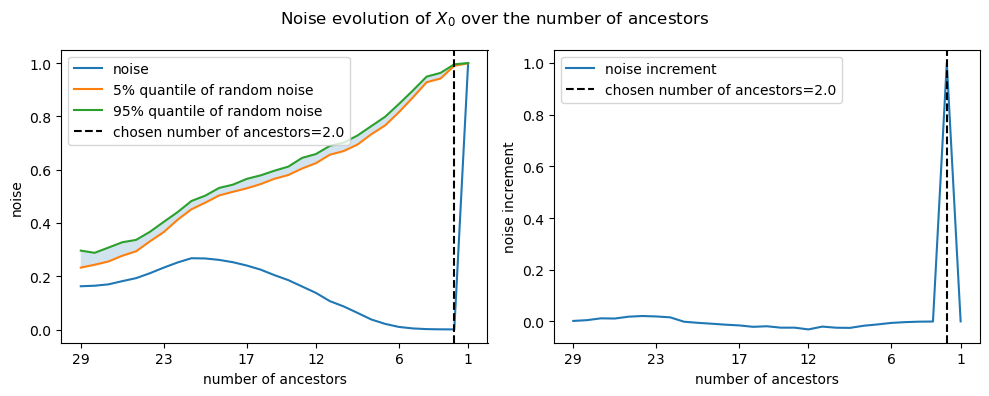


Results for $X_{1}$
Kernel [gaussian] has n/(n+s)=0.1608873135609759, Z=(0.24, 0.30), gamma=1.26e+08
$X_{1}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.16)
Ancestors of $X_{1}$: ['$X_{0}$', '$X_{2}$', '$\\ddot{X}_{1}$']



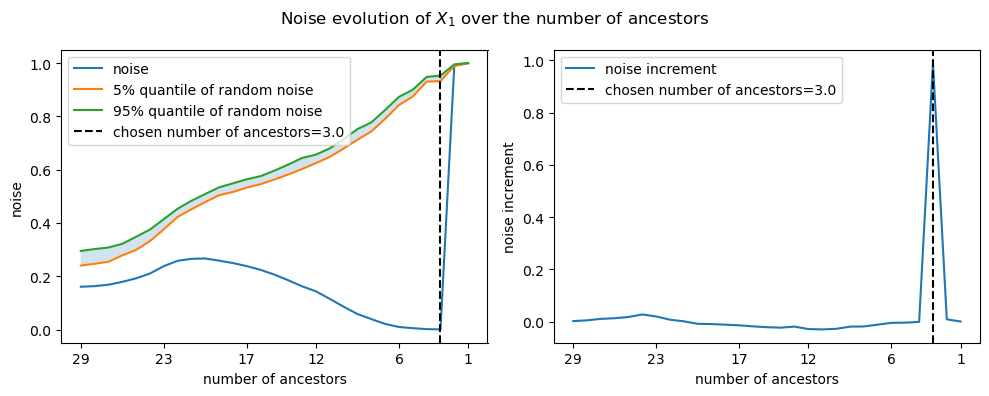

In [31]:
graph_discovery.fit(['$X_{0}$','$X_{1}$'])

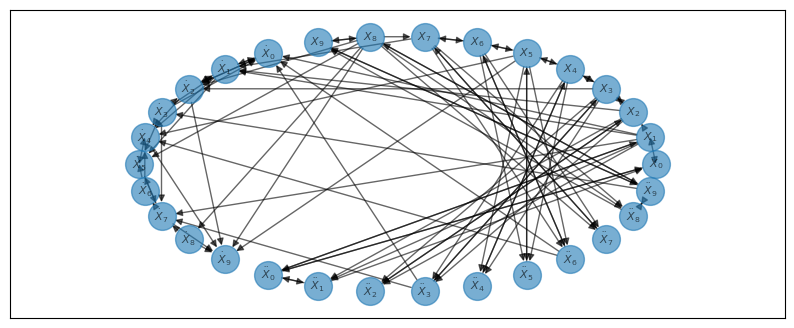

In [45]:
graph_discovery.plot_graph(type_label=False)

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1549691/3649652240.py:11: SyntaxWarning: invalid escape sequence '\d'
  G2=nx.subgraph(graph_discovery.G,[x for x in graph_discovery.G.nodes() if '\dot' not in x])


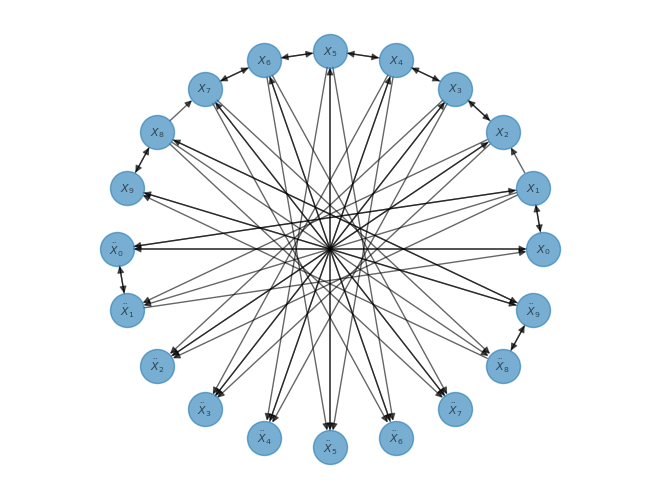

In [46]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)
G2=nx.subgraph(graph_discovery.G,[x for x in graph_discovery.G.nodes() if '\dot' not in x])
plot_a_network(G2,type_label=False)

# Non-Linear FPUT

In [47]:
df_non_linear=pd.read_csv('./examples/FPUT_non_linear.csv')
df_non_linear

$X_{0}$   $X_{1}$   $X_{2}$   $X_{3}$   $X_{4}$   $X_{5}$   $X_{6}$  \
0   -0.353162 -0.027925 -0.060415  0.151765  0.010142  0.243446 -0.032991   
1    0.181612 -0.040168  0.039506 -0.350263 -0.356168 -0.296971 -0.066569   
2    0.181387  0.689829  0.177607  0.247176  0.169467  0.147400  0.475722   
3    0.108495 -0.263442  0.085607 -0.526893  0.126317  0.168490  0.072781   
4    0.318325 -0.155868  0.214159 -0.362474  0.136723  0.003964 -0.052347   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.097388 -0.362862  0.124927 -0.376848  0.182781 -0.472934  0.278333   
996  0.055470  0.181867  0.204995 -0.480468  0.468355 -0.078220  0.418435   
997 -0.058144 -0.165295  0.084218 -0.186435  0.401695 -0.367180  0.221276   
998 -0.057468  0.207577 -0.074452 -0.340633 -0.011811  0.110838 -0.188654   
999  0.363133  0.057158  0.191549 -0.050302 -0.111199 -0.215105  0.102461   

      $X_{7}$   $X_{8}$   $X_{9}$  ...  $\ddot{X}_{0}$  $\ddot{X}_{1}$  \
0   -0.229524  0.236459  0.039009  ...       54.993213      -31.459180   
1   -0.422200 -0.463840 -0.316946  ...      -32.727555       24.910978   
2   -0.171927  0.315934 -0.125602  ...       39.097769      -82.674935   
3    0.313828 -0.278529 -0.107404  ...      -41.615858       58.430547   
4    0.296391 -0.269704 -0.238277  ...      -65.753482       69.123741   
..        ...       ...       ...  ...             ...             ...   
995 -0.110748  0.436868  0.170341  ...      -51.115928       76.849319   
996 -0.173228  0.204591 -0.434794  ...        5.935058       -8.551795   
997 -0.259655  0.445895  0.175709  ...       -4.077966       29.475257   
998 -0.131314  0.067691 -0.305993  ...       27.249219      -44.325810   
999 -0.063100 -0.255156  0.083017  ...      -54.374800       36.719806   

     $\ddot{X}_{2}$  $\ddot{X}_{3}$  $\ddot{X}_{4}$  $\ddot{X}_{5}$  \
0         20.458112      -28.800655       30.624385      -41.365914   
1        -41.681386       35.960815        5.288329       15.030604   
2         56.358749      -11.930256        4.551912       31.043421   
3        -83.291167      102.692317      -73.427018      -11.200548   
4        -79.952551       87.664703      -58.061758        6.413550   
..              ...             ...             ...             ...   
995      -80.170319       86.261473      -99.351720      115.006100   
996      -82.574678      141.558568     -140.725955       84.712117   
997      -42.152234       76.572594     -113.508261      113.522602   
998        1.669535       48.384258      -20.103760      -35.262866   
999      -30.827505       16.000652       -3.578315       35.697711   

     $\ddot{X}_{6}$  $\ddot{X}_{7}$  $\ddot{X}_{8}$  $\ddot{X}_{9}$  
0          7.920080       57.560078      -57.613237       13.551324  
1        -48.213101       29.447335       15.440301       16.737826  
2        -87.114628       94.324581      -75.442681       50.523425  
3         27.853479      -75.837294       72.815185       -5.561878  
4         35.614576      -77.602247       62.235105       17.973559  
..              ...             ...             ...             ...  
995     -104.485005       77.779434      -71.155972        9.277894  
996      -88.949437       82.119032      -88.030636       90.650482  
997      -87.621847      100.953804      -94.014955        9.174123  
998       30.598250       12.228902      -47.803172       55.306065  
999      -40.037472       -2.420546       43.865446      -36.337450  

[1000 rows x 30 columns]

In [48]:

graph_discovery_non_linear=CHD.GraphDiscovery.from_dataframe(df_non_linear,normalize=True)

new result yb=[-1.65965325e-10  6.80017778e-10  1.15366466e-09 -3.07004211e-10
 -4.07405985e-10 -1.54217424e-09  3.40053689e-10  4.87099043e-10
  6.72135782e-10  2.72820685e-11], noise=0.16866431190172018
new result yb=[-1.34093549e-09  6.21599034e-10  2.51242083e-10  4.24214953e-10
 -8.34440583e-10 -3.15869166e-11 -1.16591063e-10 -3.74867105e-11
  4.55843778e-10 -6.22166389e-10], noise=0.19332086372968665
new result yb=[-1.85077526e-10  6.04373678e-10 -8.05830896e-10  1.02330784e-09
  9.94952520e-10  6.79080765e-10 -1.35985149e-09 -1.03568515e-09
 -5.76267804e-10 -1.12074669e-09], noise=0.16913414417640515
original result yb=[ 6.64063860e-10 -2.79162166e-10  9.40227223e-10 -8.99818277e-10
 -8.42853620e-10 -6.75277305e-10  9.27729633e-10  1.23679158e-09
  7.50210141e-10  8.07266623e-10], noise=0.16891912908847026, Z=(0.25290708017418745,0.30157051194624623)
new result yb=[-1.36962041e-10  1.10850634e-09 -5.18474939e-10 -2.92268209e-10
 -3.71346700e-10  5.91148809e-11  6.46118646e-10 -1

Finding ancestors with kernel [gaussian]:   4%|▎         | 1/28 [00:01<00:32,  1.19s/it]

new result yb=[ 1.80859597e-10 -1.37668142e-09 -6.41425984e-10 -5.14418685e-10
  5.81513926e-10  3.32909300e-10 -1.46471238e-10 -1.92363317e-10
 -3.15520525e-10  7.75557635e-10], noise=0.19732690070085154
original result yb=[-7.26213333e-10  8.85459851e-10 -4.84031413e-10 -4.92209759e-10
  4.87885206e-11  1.06641348e-09  3.15084054e-11 -6.16521031e-11
 -1.03828040e-10  4.10282264e-10], noise=0.18552599685037874, Z=(0.2621718349502859,0.2979101190150926)
original result yb=[-7.27160424e-10  5.38683995e-10 -5.79141526e-10  6.04487564e-10
  9.28947108e-10  4.66029918e-10 -9.02368132e-11 -8.27228565e-10
  1.37439165e-10 -1.33548446e-10], noise=0.17243346411523383, Z=(0.25929085320435646,0.31308191952840403)
original result yb=[-1.12609253e-09  1.12777122e-09 -2.24652533e-10  9.65504459e-10
 -8.73194445e-10  2.27054812e-10  3.84435973e-10 -3.66658339e-10
  8.23735606e-10 -1.49033469e-10], noise=0.19541997778559247, Z=(0.2606173822321752,0.3120478161554861)
original result yb=[-5.57056573e-1

Finding ancestors with kernel [gaussian]:   7%|▋         | 2/28 [00:02<00:30,  1.19s/it]

new result yb=[ 1.74205100e-10 -1.35129829e-09 -6.25181071e-10 -5.04640944e-10
  5.79309831e-10  3.31152259e-10 -1.32067863e-10 -1.95944839e-10
 -2.81088768e-10  7.57415505e-10], noise=0.2085784982421462
original result yb=[-6.95876652e-10  8.53663230e-10 -4.75807314e-10 -4.89880920e-10
  3.88223588e-11  1.04403927e-09  2.77728503e-11 -7.05519985e-11
 -1.05049896e-10  3.85408507e-10], noise=0.19443183603300196, Z=(0.275219171364068,0.3223688633584677)
original result yb=[-6.58240196e-10  5.19328655e-10 -5.65759214e-10  5.53808367e-10
  8.67520521e-10  4.51122830e-10 -7.58910695e-11 -7.84778550e-10
  1.57199293e-10 -1.02894476e-10], noise=0.17772734645856533, Z=(0.2720561692447835,0.3196361625905374)
original result yb=[-1.08582861e-09  1.08725440e-09 -2.26163121e-10  9.32632867e-10
 -8.59914274e-10  2.39706888e-10  3.68263177e-10 -3.64601349e-10
  7.93087576e-10 -1.43772306e-10], noise=0.20536536395227534, Z=(0.2765882337635776,0.3239227541242211)
original result yb=[-5.20341982e-10  9

Finding ancestors with kernel [gaussian]:  11%|█         | 3/28 [00:03<00:29,  1.19s/it]

new result yb=[ 1.48430483e-10 -1.32096008e-09 -6.14487712e-10 -5.14835950e-10
  5.73435579e-10  3.26010885e-10 -1.15839534e-10 -1.83640155e-10
 -2.81067858e-10  7.71485667e-10], noise=0.22038046945912976
original result yb=[-6.52535025e-10  8.12919499e-10 -4.66670943e-10 -4.93246778e-10
  3.80801903e-11  1.02978411e-09  2.87792913e-11 -7.74081548e-11
 -1.11149733e-10  3.63240683e-10], noise=0.2047094260136928, Z=(0.2968969909387599,0.3386095934411028)
original result yb=[-6.23787717e-10  4.72249192e-10 -5.46624033e-10  5.14664654e-10
  8.02431407e-10  4.38826390e-10 -5.97744578e-11 -7.43772935e-10
  1.48930201e-10 -3.91360737e-11], noise=0.18507482285771482, Z=(0.29529534284379755,0.336848674388076)
original result yb=[-1.03900791e-09  1.02609370e-09 -2.20701496e-10  8.88581590e-10
 -8.40079485e-10  2.44885047e-10  3.62840349e-10 -3.45330623e-10
  7.64322084e-10 -1.44507310e-10], noise=0.2241031894439276, Z=(0.3025390376518392,0.34663808499131316)
original result yb=[-4.84172847e-10  

Finding ancestors with kernel [gaussian]:  14%|█▍        | 4/28 [00:04<00:28,  1.19s/it]

new result yb=[ 1.38183462e-10 -1.27218448e-09 -6.01983063e-10 -4.82022840e-10
  5.35616154e-10  3.26600509e-10 -1.07536176e-10 -2.00806075e-10
 -2.50688245e-10  7.71625915e-10], noise=0.23649295500741874
original result yb=[-6.07363027e-10  7.83825214e-10 -4.49117597e-10 -4.69975507e-10
  3.06063767e-11  9.96801919e-10  2.55222965e-11 -7.59626421e-11
 -1.19646361e-10  3.12938678e-10], noise=0.21786719087884365, Z=(0.3220274309120155,0.3593038873980539)
original result yb=[-5.82359704e-10  4.44549742e-10 -5.34162370e-10  4.71076409e-10
  7.35750310e-10  4.30672851e-10 -6.09690684e-11 -6.86082450e-10
  1.51288625e-10 -3.26907476e-11], noise=0.19327074307168693, Z=(0.31289841608322533,0.35309367459373503)
original result yb=[-1.00004249e-09  9.88912771e-10 -2.22395635e-10  8.41166790e-10
 -8.10001976e-10  2.27517621e-10  3.28135073e-10 -3.19917969e-10
  7.31081160e-10 -1.49713502e-10], noise=0.2423003775052986, Z=(0.3224560700210077,0.3649938269386125)
original result yb=[-4.30361247e-10

Finding ancestors with kernel [gaussian]:  18%|█▊        | 5/28 [00:05<00:27,  1.19s/it]

new result yb=[ 1.51408443e-10 -1.17603789e-09 -5.82152332e-10 -4.32109158e-10
  5.14604551e-10  3.15265646e-10 -1.38932614e-10 -2.16062050e-10
 -2.40888916e-10  8.05209582e-10], noise=0.2641408446753137
original result yb=[-5.10146315e-10  7.35437511e-10 -4.34577939e-10 -4.46222748e-10
  1.53422549e-11  9.62732181e-10  3.30839461e-11 -8.06568129e-11
 -1.38777398e-10  3.06294601e-10], noise=0.23639537480351316, Z=(0.3538214444981214,0.3906164321686532)
original result yb=[-5.46399656e-10  3.99417586e-10 -5.10008680e-10  4.47992366e-10
  6.82904237e-10  4.18881640e-10 -2.65424344e-11 -6.42784189e-10
  1.35850038e-10 -2.82641024e-11], noise=0.2074288160442541, Z=(0.3456694178563149,0.37969377204659727)
original result yb=[-8.90476158e-10  9.33075745e-10 -2.18793967e-10  8.19028062e-10
 -7.88454371e-10  2.23615446e-10  3.08075984e-10 -2.96967697e-10
  6.43912126e-10 -1.42288600e-10], noise=0.27009439539558594, Z=(0.36129508191570464,0.39587194801624703)
original result yb=[-3.95860752e-10

Finding ancestors with kernel [gaussian]:  21%|██▏       | 6/28 [00:07<00:26,  1.20s/it]

new result yb=[ 8.96186249e-11 -1.08287257e-09 -5.65646457e-10 -3.48312157e-10
  5.21447737e-10  2.95095534e-10 -1.48920102e-10 -2.06843879e-10
 -2.37072630e-10  7.92794903e-10], noise=0.2776446523797954
original result yb=[-4.30299134e-10  6.69394145e-10 -4.10866988e-10 -4.26593108e-10
  3.70863906e-11  9.10469334e-10  3.71168829e-11 -7.44349739e-11
 -1.33108811e-10  2.99124605e-10], noise=0.2540553165403597, Z=(0.3875533966181525,0.4216102396553276)
original result yb=[-4.54545970e-10  3.68537298e-10 -4.97117412e-10  3.84894169e-10
  6.20643197e-10  3.94408180e-10 -1.51894687e-11 -6.16448648e-10
  1.17023016e-10  1.70468909e-11], noise=0.21888098397096034, Z=(0.37153004677932916,0.4043970631045555)
original result yb=[-7.86302581e-10  8.98954806e-10 -2.05894462e-10  8.17287777e-10
 -7.92289024e-10  2.24590561e-10  2.86232560e-10 -2.83980695e-10
  6.24259230e-10 -1.76743934e-10], noise=0.2971826699460007, Z=(0.3958954758770472,0.42868906872081697)
original result yb=[-3.61194834e-10  

Finding ancestors with kernel [gaussian]:  25%|██▌       | 7/28 [00:08<00:25,  1.19s/it]

new result yb=[ 1.05899387e-10 -1.01320897e-09 -5.43361758e-10 -3.15590725e-10
  5.29380126e-10  2.95923914e-10 -1.41059450e-10 -2.33296101e-10
 -2.01372917e-10  7.57827599e-10], noise=0.2917450077949544
original result yb=[-3.89086501e-10  6.05809299e-10 -3.86897445e-10 -4.09329629e-10
  5.40960867e-11  8.73189130e-10  3.96992088e-11 -6.21443961e-11
 -1.26197054e-10  2.92153389e-10], noise=0.26561328726597827, Z=(0.4207304428018447,0.45254693596390577)
original result yb=[-4.22344390e-10  3.37651333e-10 -4.72852924e-10  3.51066479e-10
  5.68548586e-10  3.62656230e-10 -1.83081690e-11 -5.59769754e-10
  1.09738220e-10  2.85348983e-11], noise=0.23427553506224238, Z=(0.4106865875096374,0.44559195978502886)
original result yb=[-7.38118313e-10  8.45784965e-10 -2.04498788e-10  7.79006779e-10
 -7.78208918e-10  2.21164051e-10  2.64608876e-10 -2.97250507e-10
  6.11976071e-10 -1.69178114e-10], noise=0.312028889252884, Z=(0.4164016868833005,0.4461055961844819)
original result yb=[-3.30453021e-10  

Finding ancestors with kernel [gaussian]:  29%|██▊       | 8/28 [00:09<00:23,  1.19s/it]

new result yb=[ 6.27635584e-11 -9.16962058e-10 -5.24158013e-10 -3.07460646e-10
  5.15097071e-10  2.84560173e-10 -1.29226997e-10 -2.43334755e-10
 -1.94172060e-10  7.41172613e-10], noise=0.30644922639367994
original result yb=[-3.58204910e-10  5.55050167e-10 -3.51168673e-10 -3.94463450e-10
  4.82384137e-11  8.47002061e-10  3.89661527e-11 -5.30061511e-11
 -1.17875480e-10  2.91616204e-10], noise=0.2711182914828672, Z=(0.4504826906128503,0.4764943635773806)
original result yb=[-3.55617167e-10  3.12790147e-10 -4.59856523e-10  3.00138993e-10
  5.23831485e-10  3.50420680e-10  1.31617458e-11 -5.25578517e-10
  9.54798624e-11  1.94365951e-11], noise=0.24286478784339768, Z=(0.44102698180542205,0.47389852374028135)
original result yb=[-7.31163351e-10  8.03850051e-10 -1.96554065e-10  7.42169756e-10
 -7.54056632e-10  2.09076219e-10  2.54696114e-10 -2.39285394e-10
  5.23712234e-10 -1.49663506e-10], noise=0.32812820827426536, Z=(0.43663354971506624,0.4669995452154782)
original result yb=[-3.20441426e-1

Finding ancestors with kernel [gaussian]:  32%|███▏      | 9/28 [00:10<00:22,  1.19s/it]

new result yb=[ 3.60532299e-11 -8.84226962e-10 -5.05973584e-10 -2.95363037e-10
  4.91082353e-10  2.51291475e-10 -1.13331172e-10 -2.27071181e-10
 -2.07572322e-10  7.56931400e-10], noise=0.31745025076015054
original result yb=[-3.69849098e-10  5.30264620e-10 -3.13175159e-10 -4.13403588e-10
  5.05731973e-11  8.37686582e-10  4.50835561e-11 -3.54194436e-11
 -7.45675352e-11  2.57195274e-10], noise=0.27057454891952065, Z=(0.47330236029358147,0.5014811298271885)
original result yb=[-2.93840359e-10  2.82835212e-10 -4.51289789e-10  2.71144805e-10
  4.90872097e-10  3.00795164e-10  3.84343161e-11 -4.94627557e-10
  1.01168784e-10  4.18885644e-11], noise=0.24158124054782495, Z=(0.45994929372208226,0.48908313763542677)
original result yb=[-6.97953233e-10  7.71507922e-10 -2.01182454e-10  7.05583029e-10
 -7.41856800e-10  1.96595223e-10  2.23875274e-10 -2.52456380e-10
  4.74557639e-10 -1.57750431e-10], noise=0.3399509761946306, Z=(0.4538004117551,0.48323636110735446)
original result yb=[-3.09575255e-10 

Finding ancestors with kernel [gaussian]:  36%|███▌      | 10/28 [00:11<00:21,  1.19s/it]

new result yb=[ 2.77429094e-11 -7.90517577e-10 -4.83572921e-10 -2.81504728e-10
  4.84650273e-10  2.27214847e-10 -9.52781237e-11 -2.37230068e-10
 -2.12775168e-10  7.42223450e-10], noise=0.3312706713779456
original result yb=[-3.38947129e-10  5.05482274e-10 -2.99183247e-10 -3.88096414e-10
  4.58950292e-11  8.30176175e-10  4.88570262e-11 -4.22296135e-11
 -8.75772337e-11  2.38972964e-10], noise=0.26539872203436604, Z=(0.4882375248285758,0.5186885982484175)
original result yb=[-2.68054102e-10  2.36419287e-10 -4.45340897e-10  2.63429519e-10
  4.71483307e-10  2.90700593e-10  5.48510551e-11 -3.88607026e-10
  9.89725464e-11  6.32741599e-11], noise=0.23930827585073203, Z=(0.47844795073514057,0.5020117365633583)
original result yb=[-7.09997073e-10  7.78134869e-10 -2.11100302e-10  6.74524033e-10
 -7.31019109e-10  1.69464114e-10  1.83933673e-10 -2.57259335e-10
  4.03249507e-10 -1.65800122e-10], noise=0.3546563342354512, Z=(0.4728483404382068,0.5050802652206353)
original result yb=[-3.20628339e-10  

Finding ancestors with kernel [gaussian]:  39%|███▉      | 11/28 [00:13<00:20,  1.19s/it]

new result yb=[-6.59638571e-11 -7.54315835e-10 -4.65237887e-10 -2.86965556e-10
  5.00175838e-10  2.21500080e-10 -3.92270116e-11 -2.39407176e-10
 -2.00923416e-10  7.41378424e-10], noise=0.3419344528154423
original result yb=[-2.93123903e-10  4.62542122e-10 -2.88965091e-10 -3.99616191e-10
  8.00128724e-11  8.05843512e-10  4.23533015e-11 -4.22453845e-11
 -6.25155075e-11  2.34707124e-10], noise=0.2573858185078616, Z=(0.5028989868665,0.5283296844417413)
original result yb=[-2.58509385e-10  2.20058846e-10 -4.36843455e-10  2.31339531e-10
  4.53776758e-10  2.15854565e-10  7.10693508e-11 -3.67102228e-10
  9.02040349e-11  1.23829556e-10], noise=0.234096983161845, Z=(0.4934055660933702,0.5242361240052615)
original result yb=[-7.16503239e-10  7.30334857e-10 -2.27825115e-10  6.56875600e-10
 -7.64372214e-10  1.94218804e-10  1.72623866e-10 -2.62207516e-10
  3.87943551e-10 -1.69788057e-10], noise=0.36846108338872907, Z=(0.49574436246665654,0.52455197997728)
original result yb=[-3.08985503e-10  5.27252

Finding ancestors with kernel [gaussian]:  43%|████▎     | 12/28 [00:14<00:19,  1.19s/it]

new result yb=[-5.62595771e-11 -7.02151504e-10 -4.38715205e-10 -2.39766024e-10
  5.29418909e-10  2.28939494e-10 -4.57785646e-11 -2.96872418e-10
 -1.74502794e-10  7.27274399e-10], noise=0.3514556445048411
original result yb=[-2.59546615e-10  4.41625989e-10 -2.86942432e-10 -4.03331038e-10
  1.24603282e-10  7.75069803e-10  2.82844502e-12 -6.73832469e-11
 -7.28079115e-11  2.49435902e-10], noise=0.24700467937224702, Z=(0.521981639446989,0.5459698213775909)
original result yb=[-2.09289932e-10  2.14743101e-10 -4.35595905e-10  2.21253386e-10
  4.31429519e-10  2.07412442e-10  7.47504508e-11 -3.09186246e-10
  9.29279855e-11  1.38151253e-10], noise=0.22733704135487148, Z=(0.5080538560227734,0.5362309678947264)
original result yb=[-6.85209432e-10  7.34272561e-10 -2.36246519e-10  6.46360491e-10
 -7.91231264e-10  1.94140740e-10  1.46156967e-10 -2.47910087e-10
  3.92216237e-10 -1.75300571e-10], noise=0.37547929850269673, Z=(0.5052571363295311,0.5331422006699899)
original result yb=[-3.07064559e-10  4

Finding ancestors with kernel [gaussian]:  46%|████▋     | 13/28 [00:15<00:17,  1.19s/it]

new result yb=[-9.83755647e-11 -6.87492358e-10 -4.39418020e-10 -1.49512538e-10
  5.72750182e-10  2.47803133e-10 -3.51893170e-11 -3.04252365e-10
 -1.54731686e-10  7.41561678e-10], noise=0.3625031803978748
original result yb=[-2.36766013e-10  3.07310787e-10 -2.65200175e-10 -4.14034817e-10
  1.05317574e-10  7.75663777e-10  1.74248161e-11 -5.58339101e-11
 -7.94723456e-11  2.33825265e-10], noise=0.2332300542849587, Z=(0.5278939873605198,0.5629230876083228)
original result yb=[-1.88890358e-10  2.06814672e-10 -4.27259158e-10  2.13486593e-10
  4.34806724e-10  1.55880341e-10  8.16234526e-11 -2.75258956e-10
  9.47038704e-11  1.64686527e-10], noise=0.21915836375168393, Z=(0.5227828515651359,0.5500492491528984)
original result yb=[-7.04256566e-10  7.38972017e-10 -2.46772750e-10  6.40737205e-10
 -7.83220787e-10  1.92858369e-10  1.35180745e-10 -2.27863964e-10
  3.98704825e-10 -1.67445116e-10], noise=0.38441022516463497, Z=(0.5150917294943919,0.544589806939148)
original result yb=[-2.96075651e-10  3.

Finding ancestors with kernel [gaussian]:  50%|█████     | 14/28 [00:16<00:16,  1.19s/it]

new result yb=[-2.27376625e-10 -6.93821767e-10 -4.37088154e-10 -1.01139799e-10
  5.85293735e-10  2.56596180e-10 -6.97299605e-11 -2.70248392e-10
 -9.82948699e-11  7.76995537e-10], noise=0.373691061561497
original result yb=[-2.09896500e-10  2.71249980e-10 -2.42899637e-10 -3.89478272e-10
  1.06390146e-10  7.70175431e-10 -5.04146178e-12 -4.53689615e-11
 -8.09648537e-11  2.08942502e-10], noise=0.22044839454213436, Z=(0.5508249421833065,0.5800106201625539)
original result yb=[-1.68673036e-10  1.99883607e-10 -4.39088238e-10  1.85617124e-10
  4.15701240e-10  1.43384813e-10  9.70031340e-11 -1.70766257e-10
  1.01202442e-10  1.81381951e-10], noise=0.2069044616536718, Z=(0.5419497273314304,0.574083226323879)
original result yb=[-7.15544728e-10  7.55043748e-10 -3.13159717e-10  6.35303272e-10
 -7.91143366e-10  1.85103198e-10  1.55363190e-10 -2.10709906e-10
  3.91133771e-10 -1.54141260e-10], noise=0.40060169884490265, Z=(0.5351475703200025,0.5608598138427254)
original result yb=[-2.76924514e-10  3.4

Finding ancestors with kernel [gaussian]:  54%|█████▎    | 15/28 [00:17<00:15,  1.19s/it]

new result yb=[-2.91936115e-10 -6.68740919e-10 -4.15075783e-10 -5.88577113e-11
  6.34584725e-10  2.50198405e-10  8.00794742e-11 -2.95701236e-10
 -7.05131050e-11  8.30463317e-10], noise=0.3870991552759253
original result yb=[-1.78330986e-10  2.60985716e-10 -1.97868916e-10 -4.00094827e-10
  1.21890731e-10  7.57369817e-10  4.77513925e-12 -4.45653507e-11
 -7.91815011e-11  1.99928424e-10], noise=0.2070433221747427, Z=(0.5590307664019427,0.5906216474145178)
original result yb=[-1.32625070e-10  1.85580631e-10 -4.63219574e-10  1.51658841e-10
  3.59877507e-10  1.25074150e-10  1.24806997e-10 -3.72966883e-11
  1.25303763e-10  1.90360631e-10], noise=0.19490082552587665, Z=(0.556100068364649,0.5895499884882145)
original result yb=[-7.66241141e-10  7.29073614e-10 -3.05096716e-10  6.92838287e-10
 -8.55430740e-10  2.16647488e-10  1.69560351e-10 -2.08874790e-10
  3.96942909e-10 -1.51145850e-10], noise=0.41230397777151684, Z=(0.5502460338060853,0.5769333847209666)
original result yb=[-2.37702142e-10  3.

Finding ancestors with kernel [gaussian]:  57%|█████▋    | 16/28 [00:19<00:14,  1.19s/it]

new result yb=[-3.04551836e-10 -6.82072334e-10 -3.88558612e-10  4.37048601e-12
  6.63089303e-10  2.57892258e-10  2.98171996e-11 -2.55684582e-10
 -2.09631933e-11  8.94802922e-10], noise=0.40206118108917144
original result yb=[-1.46091151e-10  2.68656587e-10 -1.39634599e-10 -4.30700216e-10
  1.32031927e-10  7.74706283e-10 -1.23008311e-11 -5.18173015e-11
 -7.17315663e-11  1.69208431e-10], noise=0.1913320843400901, Z=(0.57310618403076,0.60389277099437)
original result yb=[-1.02008822e-10  1.82562983e-10 -4.60758223e-10  1.00059120e-10
  2.64980599e-10  1.23050839e-10  1.48824577e-10 -1.42603677e-11
  1.39287869e-10  2.34453533e-10], noise=0.17766400218360212, Z=(0.5735585373532955,0.6063606976273409)
original result yb=[-8.60869975e-10  7.49449456e-10 -3.26638080e-10  6.28226003e-10
 -9.04883002e-10  2.64955158e-10  1.61188932e-10 -2.53146412e-10
  3.75613096e-10 -1.34211597e-10], noise=0.4299219478938405, Z=(0.5648831823405781,0.5943048535781678)
original result yb=[-1.97241755e-10  4.266

Finding ancestors with kernel [gaussian]:  61%|██████    | 17/28 [00:20<00:13,  1.19s/it]

new result yb=[-3.33836998e-10 -6.31630612e-10 -6.54119682e-11  2.74529796e-10
  7.95961290e-10  2.98803178e-10 -9.53306530e-11 -2.62678643e-10
 -8.52805879e-13  9.46663238e-10], noise=0.4215262494932606
original result yb=[-8.21670108e-11  2.23905293e-10 -9.25106196e-11 -4.36570296e-10
  1.55940362e-10  8.11825270e-10 -4.05962004e-11 -6.14009958e-11
 -8.48682186e-11  1.54972344e-10], noise=0.17364859934471186, Z=(0.5920191885191636,0.6276814129074537)
original result yb=[-5.86834684e-11  1.25334613e-10 -4.66585204e-10  5.34387558e-11
  2.15561063e-10  1.13607283e-10  1.45347102e-10  1.73231292e-11
  1.41160295e-10  2.10755308e-10], noise=0.16291273465192044, Z=(0.5874860118004096,0.621846417446204)
original result yb=[-8.84990945e-10  7.92379944e-10 -3.54506656e-10  6.63830700e-10
 -9.28824604e-10  2.80229319e-10  1.39236842e-10 -2.51075379e-10
  3.74206668e-10 -1.76669319e-10], noise=0.4411717688507, Z=(0.5711993574954699,0.5968040975598312)
original result yb=[-1.87882311e-10  4.364

Finding ancestors with kernel [gaussian]:  64%|██████▍   | 18/28 [00:21<00:11,  1.19s/it]

new result yb=[-4.29725557e-10 -5.94547633e-10 -1.05330007e-10  2.95882096e-10
  8.21104256e-10  3.06178957e-10 -1.66610080e-10 -2.01226500e-10
 -9.40093531e-12  9.54726967e-10], noise=0.4331761778809324
original result yb=[ 1.40519670e-10  4.47882841e-11 -6.63916762e-11 -5.33052347e-10
  1.00604444e-10  8.75512014e-10 -1.44544757e-11 -5.53725369e-11
 -6.90676464e-12  1.48760401e-10], noise=0.14468983877561578, Z=(0.6210990944690722,0.6518509036604367)
original result yb=[-5.22949091e-11  7.93052160e-11 -4.42005627e-10  3.73118533e-11
  1.45168024e-10  4.66032516e-11  1.34976704e-10  1.02641120e-10
  1.26700884e-10  1.57103370e-10], noise=0.14549455113783788, Z=(0.6040998082781203,0.6377115133510324)
original result yb=[-9.37045513e-10  7.81507743e-10 -4.17663371e-10  7.18614096e-10
 -1.00602108e-09  3.99556870e-10  1.40986642e-10 -2.42823521e-10
  4.11535297e-10 -1.90371282e-10], noise=0.46207419814765605, Z=(0.581583014866278,0.6137955672538126)
original result yb=[-1.86208330e-10  3

Finding ancestors with kernel [gaussian]:  68%|██████▊   | 19/28 [00:22<00:10,  1.19s/it]

new result yb=[-5.42698000e-10 -6.03265149e-10 -5.39727082e-11  2.77545336e-10
  8.95239244e-10  3.30915568e-10 -2.09864750e-10 -1.73114878e-10
  2.76676600e-11  1.01565673e-09], noise=0.44868040086922517
original result yb=[ 2.81606902e-10  5.08027202e-11 -5.40142799e-12 -5.98125481e-10
  1.20978095e-10  9.54816647e-10 -9.46253222e-11 -6.90462423e-11
  1.13607657e-10  1.79260081e-10], noise=0.10401767079250838, Z=(0.6572250618366606,0.6957845090946079)
original result yb=[ 9.46830568e-11 -2.79881545e-11 -4.38860726e-10  6.22257192e-11
  1.15116475e-10  5.40511765e-11  1.47908511e-10  1.03520888e-10
  1.27090842e-10  1.54000691e-10], noise=0.1301280522143179, Z=(0.6237943911672557,0.6561443227854762)
original result yb=[-1.16618277e-09  8.44150608e-10 -5.29444605e-10  7.30938707e-10
 -1.11029536e-09  3.68255486e-10  3.17757537e-10 -2.73693308e-10
  4.04858386e-10 -1.92826061e-10], noise=0.4832946927379228, Z=(0.5960358071833844,0.6231612457100574)
original result yb=[-1.07128048e-10  3

Finding ancestors with kernel [gaussian]:  71%|███████▏  | 20/28 [00:23<00:09,  1.19s/it]

new result yb=[-9.28712339e-10 -6.96978329e-10  5.75074226e-11  2.67881370e-10
  1.06707613e-09  5.37276679e-10 -2.91362592e-10 -1.86786189e-10
  3.15922075e-11  1.20597321e-09], noise=0.48254807714091225
original result yb=[ 4.52425254e-10 -1.63763374e-10 -7.31541738e-11 -6.44591734e-10
  1.44743656e-10  9.92471599e-10  1.97903503e-11 -3.22442992e-11
  3.00209727e-10  2.55692663e-10], noise=0.08254460442853272, Z=(0.6822414755416877,0.7208020181565667)
original result yb=[ 1.33184779e-10 -8.10954041e-11 -4.31274702e-10 -8.79226290e-12
 -9.13906806e-11  6.18791788e-11  1.23175053e-10  9.48206299e-11
  7.75764925e-11  4.34984446e-11], noise=0.10968730421294369, Z=(0.6433645439387681,0.6769552417007177)
original result yb=[-1.49775389e-09  8.02993327e-10 -6.16429465e-10  8.03629782e-10
 -1.24035307e-09  4.09043830e-10  3.72249454e-10 -3.60876400e-10
  2.91706494e-10 -2.12554054e-10], noise=0.5149075206406143, Z=(0.6127491913575931,0.6443696139093373)
original result yb=[-2.38142383e-10  

Finding ancestors with kernel [gaussian]:  75%|███████▌  | 21/28 [00:25<00:08,  1.19s/it]

new result yb=[-1.67856058e-09 -7.67742289e-10  2.38914403e-10  3.70775324e-10
  1.34226983e-09  3.37040726e-10 -1.71268300e-09 -6.62491268e-10
 -2.45306430e-10  1.43601908e-09], noise=0.5432995937905268
original result yb=[ 5.17896915e-10 -2.24077135e-10  2.76252665e-10 -8.76864507e-10
  2.37652380e-10  8.37627544e-10  7.67649517e-11 -1.59394352e-10
  1.39123430e-10  3.07218842e-11], noise=0.06539262554161465, Z=(0.7166886558454453,0.756431915307191)
original result yb=[ 2.39380960e-10 -1.89142651e-10 -4.14616973e-10 -2.60178527e-11
 -1.63088030e-10  1.16102387e-10  9.98615123e-11  3.42503810e-11
 -4.39586487e-11 -4.53611362e-11], noise=0.08920340219136191, Z=(0.6695252794631515,0.7087622991823552)
original result yb=[-1.71297057e-09  9.63465917e-10 -7.94369178e-10  1.32179087e-09
 -2.05876327e-09  5.23629452e-10  4.68134814e-10 -3.59501577e-10
  5.12228475e-10 -3.83479200e-10], noise=0.5716051158889089, Z=(0.6383512417551978,0.6692843964508233)
original result yb=[-7.86192037e-10  2.

Finding ancestors with kernel [gaussian]:  79%|███████▊  | 22/28 [00:26<00:07,  1.19s/it]

new result yb=[-2.31486894e-09 -1.54665774e-09  5.60430945e-10  4.88187824e-10
  2.19087500e-09  1.74160352e-10 -3.49670893e-09 -1.97367146e-09
  1.44213951e-09  2.91629393e-09], noise=0.6028580312936327
original result yb=[ 1.11002481e-09 -2.15767344e-10  5.32232670e-10 -9.69393890e-10
  7.91681831e-10  1.02643880e-09 -1.20459102e-10 -3.81860718e-10
  5.25780803e-10  1.09262698e-10], noise=0.04644543125686649, Z=(0.7519604098319081,0.788366668534543)
original result yb=[ 4.56021697e-10 -2.17201252e-10 -2.71433670e-10 -1.34548959e-10
 -3.39748551e-12 -9.43598874e-12  4.69645153e-11 -1.10989444e-10
 -2.59616931e-11 -1.71816107e-11], noise=0.057522144151861986, Z=(0.7199792429655829,0.7568123716360924)
original result yb=[-3.13845926e-09  9.31288673e-10 -1.11915978e-09  2.83830739e-09
 -2.68132512e-09  4.27434177e-10  3.79507135e-10 -5.27255706e-10
  4.54423215e-10 -7.18597248e-10], noise=0.6240433938236661, Z=(0.6638919257547792,0.6927911782872319)
original result yb=[-2.04472954e-09  8

Finding ancestors with kernel [gaussian]:  82%|████████▏ | 23/28 [00:27<00:05,  1.19s/it]

new result yb=[-3.59312191e-09 -2.14963693e-09  2.78467539e-09  3.13077921e-09
  6.22864168e-09 -6.07458316e-09 -5.36546754e-09 -6.62508528e-09
  5.07424656e-10  7.91380642e-09], noise=0.6829440566921103
original result yb=[ 1.41556072e-09  1.84648791e-10  9.59651915e-10 -1.20826199e-09
  9.15198727e-10  1.32033861e-09 -4.38963846e-11 -3.13059710e-10
  3.04636193e-10 -4.65179431e-10], noise=0.04102439276530021, Z=(0.7838981498983691,0.8154925489531163)
original result yb=[ 1.03573354e-09 -3.14029079e-10 -6.65365472e-10 -9.50531560e-11
  3.05947482e-10  9.18360579e-11  7.93827447e-11 -1.31052228e-10
  1.05305150e-11 -1.57846755e-10], noise=0.04508469886097619, Z=(0.7580009979820038,0.7944309135963221)
original result yb=[-7.58016395e-09  1.80048853e-09 -3.48133254e-09  5.77828728e-09
 -6.46517750e-09  1.98675912e-10  2.92787791e-09 -1.60806183e-09
  8.34150134e-11 -1.50864243e-09], noise=0.6852486666342433, Z=(0.702761978337348,0.7377231070350188)
original result yb=[-4.60765164e-09  1.

Finding ancestors with kernel [gaussian]:  86%|████████▌ | 24/28 [00:28<00:04,  1.19s/it]

new result yb=[-8.85066466e-09 -2.77845621e-09 -1.12103731e-08  1.88636506e-09
  2.03771637e-08 -4.07008384e-09  8.15784288e-09 -3.36497511e-08
  3.93118890e-09  2.42745890e-08], noise=0.7844590249804135
original result yb=[ 6.72708552e-10  1.49186464e-09  1.92065500e-09 -1.22046232e-09
  6.42251763e-10  1.21160773e-09  4.09273044e-10 -1.06868532e-09
  6.04156056e-11 -9.60781297e-10], noise=0.02894207644669072, Z=(0.8235202708705303,0.8587189922036009)
original result yb=[ 1.34392747e-09  1.65748525e-10 -1.54909936e-09  4.18484043e-11
  8.61354582e-10  1.01372194e-10  1.37379491e-11 -5.10514499e-10
  3.92234865e-10 -1.12231923e-09], noise=0.048395887375008745, Z=(0.7952428204596688,0.8254327701402577)
original result yb=[-6.55784187e-08  8.79871088e-09 -3.28867409e-08  9.52969894e-09
 -2.10633961e-08 -2.60310215e-10 -7.80670994e-10 -3.03613934e-09
  7.16774665e-09 -6.08671116e-09], noise=0.7695263616030207, Z=(0.7608156526544122,0.8005934230250334)
original result yb=[-8.62049938e-09  

Finding ancestors with kernel [gaussian]:  89%|████████▉ | 25/28 [00:29<00:03,  1.19s/it]

new result yb=[-1.96914248e-07 -3.83591915e-08 -1.33835508e-07 -5.46670502e-07
  1.91938095e-07  2.63786770e-07  5.23813708e-07 -2.51114547e-07
  1.25947264e-07  5.23322938e-07], noise=0.8720793830979404
original result yb=[-8.15363426e-09  8.55496012e-09  4.88962843e-09 -8.32761358e-09
  3.42020598e-09  8.16950341e-09 -5.12818633e-09 -1.16328029e-08
  8.58102181e-10  6.39337783e-09], noise=0.02456703516018919, Z=(0.8777015036517753,0.909541493385079)
original result yb=[ 1.04953270e-09  5.63409758e-09 -1.25710518e-09  5.56387185e-09
  3.31539485e-09  6.63914727e-10  6.76954036e-09  1.23293016e-09
  1.45282600e-10  2.29585774e-09], noise=0.03166436771382288, Z=(0.8701616463830277,0.8961633827365917)
original result yb=[-1.45117202e-06  8.49398608e-09 -1.51356603e-07  4.25621818e-07
 -1.04007842e-06 -9.02406172e-09 -2.01427540e-07  5.60830401e-08
  4.79474589e-07  3.59218763e-07], noise=0.8807023027609695, Z=(0.8520727127372242,0.8768624665394793)
original result yb=[-6.84904788e-08  3.

Finding ancestors with kernel [gaussian]:  93%|█████████▎| 26/28 [00:30<00:02,  1.18s/it]

new result yb=[-0.00212295 -0.00379591 -0.003211   -0.00588454  0.01330814  0.00440977
 -0.00243157 -0.00204004  0.00114908  0.0221509 ], noise=0.9452065155016761
original result yb=[ 5.02712421e-07 -5.28933164e-08 -6.09164301e-07  3.90472329e-07
  2.46986093e-07  2.93884051e-08  1.36998752e-07 -1.36645965e-06
  3.20984005e-07  1.86865596e-07], noise=0.017640764312511447, Z=(0.935026696283888,0.9528136564352115)
original result yb=[ 2.84810657e-06  4.04136633e-07 -1.31202734e-08 -2.37196624e-06
 -1.26196186e-06  2.97926516e-07 -1.73377209e-07 -3.74408760e-06
  2.47037103e-06 -4.48976384e-08], noise=0.01971066177971817, Z=(0.9412717871655834,0.9589356109410374)
original result yb=[-1.28307529e-02 -2.77734135e-04 -1.30448858e-04 -4.34957957e-04
 -3.46906225e-05 -8.67914986e-07 -9.02907856e-05 -3.07497043e-05
  2.08785924e-03  4.60745880e-05], noise=0.9566860998679411, Z=(0.9316648594403432,0.9534342601604062)
original result yb=[-0.00073716 -0.00252489  0.00526356  0.01064088  0.0021607 

Finding ancestors with kernel [gaussian]:  96%|█████████▋| 27/28 [00:32<00:01,  1.17s/it]

new result yb=[nan nan nan nan nan nan nan nan nan nan], noise=nan
original result yb=[-1.50487020e+03 -7.53618108e+05 -5.76654998e+04  7.81639213e+05
  7.38247157e+05  1.23080422e+02  2.70464110e+05 -7.33841938e+05
  7.00559394e+05 -4.46057281e+05], noise=-47.4920085974754, Z=(-324.2413016389257,133.50225766344485)
original result yb=[ 9.68220419e-04  7.87031826e-04 -5.85419622e-07 -1.03130463e-02
  1.23541576e-02 -3.68562932e-03  1.11566014e-02  3.59991197e-03
  1.47244633e-02 -5.92105815e-03], noise=3.6527055296365707, Z=(-1268.5467400920895,1025.5754864960136)
original result yb=[   -3309.94558374   655180.40769275    87355.36856278 -2963489.76150616
  1021819.05303815 -3282647.89240462  -803345.38789562   -16063.5929238
 -1989230.50892443   116041.75621716], noise=-148.87131336331453, Z=(-368.7645321778673,439.24607629611995)
original result yb=[ 7.53381649e+02  1.39222634e+05 -1.00198681e+05 -5.14958142e+05
  6.10813333e+05  1.08463619e+06  6.85383650e+04  1.07241879e+06
  6.6666

Finding ancestors with kernel [gaussian]: 100%|██████████| 28/28 [00:33<00:00,  1.19s/it]

new result yb=[nan nan nan nan nan nan nan nan nan nan], noise=nan
original result yb=[-5.04610934e+03 -2.18240836e+07 -1.42859390e+07 -1.03616805e+07
 -4.49688623e+07 -1.43253687e+08 -8.76809524e+07  5.25496421e+07
 -1.05877469e+07 -1.32150396e+07], noise=17.156027294420657, Z=(1.601694582107142,18.551780803428667)
original result yb=[   202806.21044571   9039387.34219507   3045181.77653078
  38531788.10781709 -22247990.15587018  -1835492.72144602
  44569278.40408809   6468761.04154522 -17095067.90857807
 -32771423.62686749], noise=4.488029214747724, Z=(1.0145980017114333,2.4390842519388243)
original result yb=[-5.58638579e+03 -1.64844200e+06  1.12752559e+07 -5.42630095e+07
  1.21854493e+08  3.11553233e+07  1.69096008e+08 -3.07685584e+07
 -2.97009407e+07  7.12085955e+07], noise=-4.877000747948092, Z=(-22.153624897796426,28.486383355107066)
original result yb=[-7.74129096e+03  3.46291590e+05  4.38291237e+06  5.75211596e+06
 -1.66903756e+07  4.43924572e+07  3.55643315e+07  2.63342739e+0


Results for $X_{0}$
Kernel [linear] has n/(n+s)=0.557291369363603, Z=(1.00, 1.00), gamma=4.94e+00
Kernel [quadratic] has n/(n+s)=0.5866522095091703, Z=(0.94, 0.96), gamma=1.60e+00
Kernel [gaussian] has n/(n+s)=0.17921307533094044, Z=(0.25, 0.30), gamma=2.85e+08
$X_{0}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.56)
Ancestors of $X_{0}$: ['$X_{1}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$']



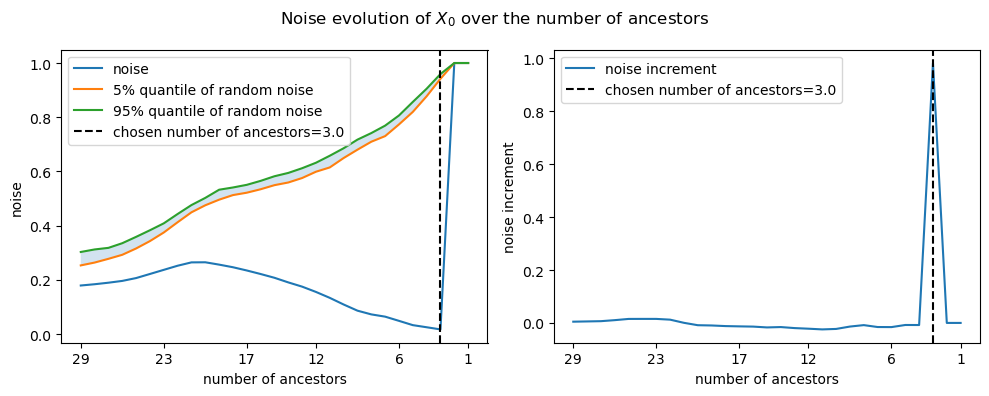


Results for $X_{1}$
Kernel [linear] has n/(n+s)=0.548739159865869, Z=(1.00, 1.00), gamma=7.20e+00
Kernel [quadratic] has n/(n+s)=0.5816585721510626, Z=(0.94, 0.96), gamma=2.33e+00
Kernel [gaussian] has n/(n+s)=0.17981440580791044, Z=(0.25, 0.30), gamma=2.85e+08
$X_{1}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.55)
Ancestors of $X_{1}$: ['$X_{0}$', '$\\ddot{X}_{0}$', '$\\ddot{X}_{1}$']



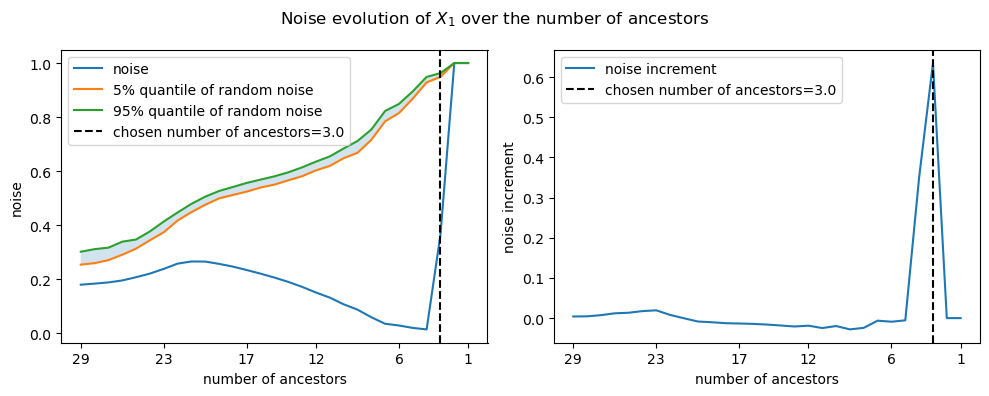


Results for $X_{2}$
Kernel [linear] has n/(n+s)=0.5600441794730538, Z=(1.00, 1.00), gamma=6.82e+00
Kernel [quadratic] has n/(n+s)=0.5920334073198162, Z=(0.94, 0.96), gamma=2.42e+00
Kernel [gaussian] has n/(n+s)=0.18215433118622026, Z=(0.25, 0.30), gamma=2.83e+08
$X_{2}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.56)
Ancestors of $X_{2}$: ['$X_{1}$', '$X_{3}$', '$\\ddot{X}_{2}$']



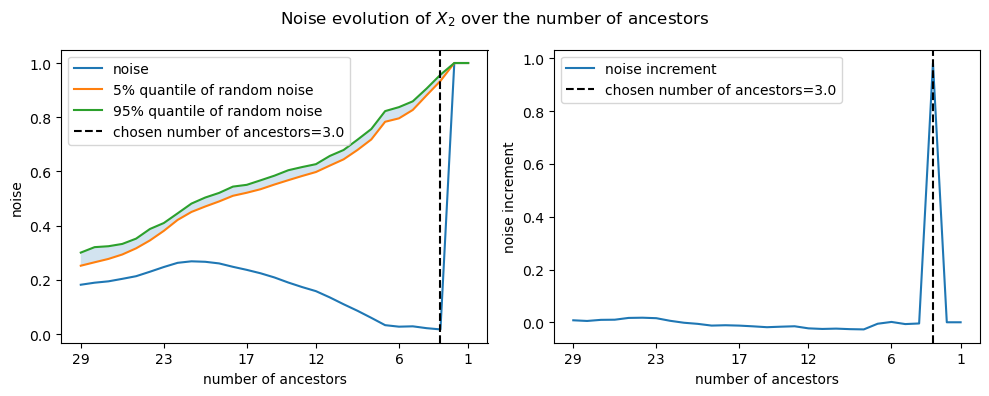


Results for $X_{3}$
Kernel [linear] has n/(n+s)=0.5660721776368938, Z=(1.00, 1.00), gamma=5.81e+00
Kernel [quadratic] has n/(n+s)=0.5889835067783408, Z=(0.94, 0.96), gamma=2.29e+00
Kernel [gaussian] has n/(n+s)=0.18281280689915058, Z=(0.25, 0.30), gamma=2.83e+08
$X_{3}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.57)
Ancestors of $X_{3}$: ['$X_{2}$', '$X_{4}$', '$\\ddot{X}_{3}$']



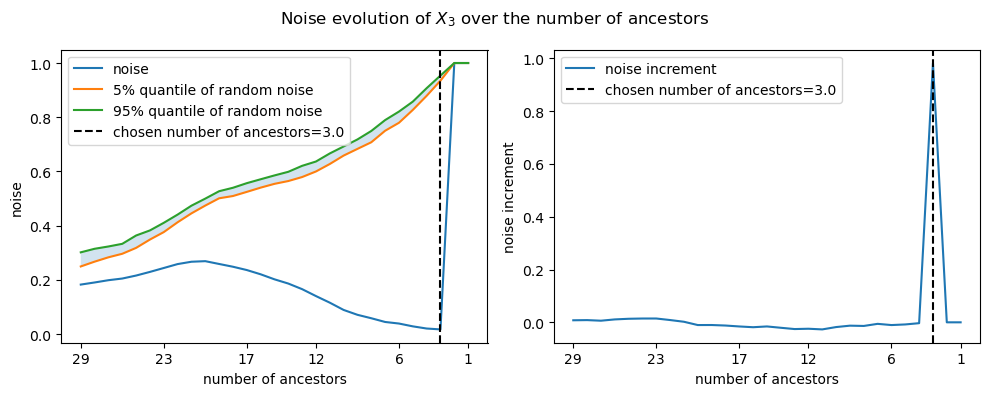


Results for $X_{4}$
Kernel [linear] has n/(n+s)=0.557731099364539, Z=(1.00, 1.00), gamma=7.96e+00
Kernel [quadratic] has n/(n+s)=0.5849459473995152, Z=(0.94, 0.96), gamma=2.79e+00
Kernel [gaussian] has n/(n+s)=0.18340761228111033, Z=(0.25, 0.30), gamma=2.85e+08
$X_{4}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.56)
Ancestors of $X_{4}$: ['$X_{3}$', '$X_{5}$', '$\\ddot{X}_{4}$']



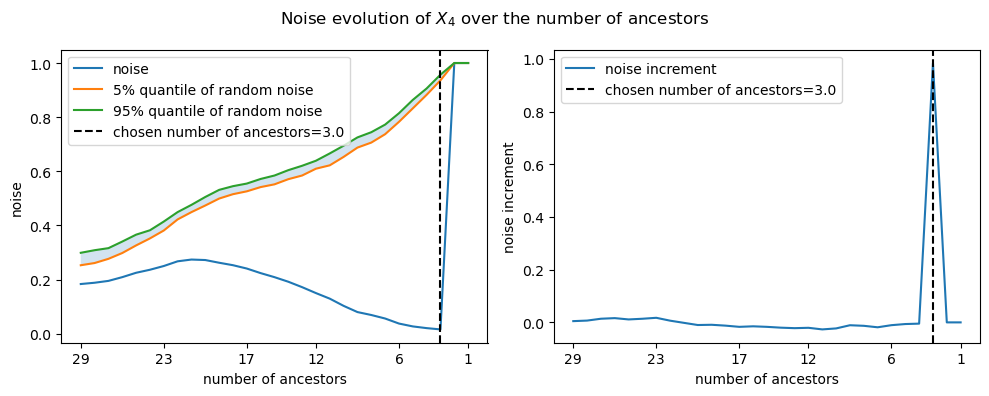


Results for $X_{5}$
Kernel [linear] has n/(n+s)=0.5496714028867064, Z=(1.00, 1.00), gamma=7.83e+00
Kernel [quadratic] has n/(n+s)=0.5712510481713979, Z=(0.94, 0.96), gamma=2.71e+00
Kernel [gaussian] has n/(n+s)=0.18137507717147455, Z=(0.25, 0.30), gamma=2.83e+08
$X_{5}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.55)
Ancestors of $X_{5}$: ['$X_{4}$', '$X_{6}$', '$\\ddot{X}_{5}$']



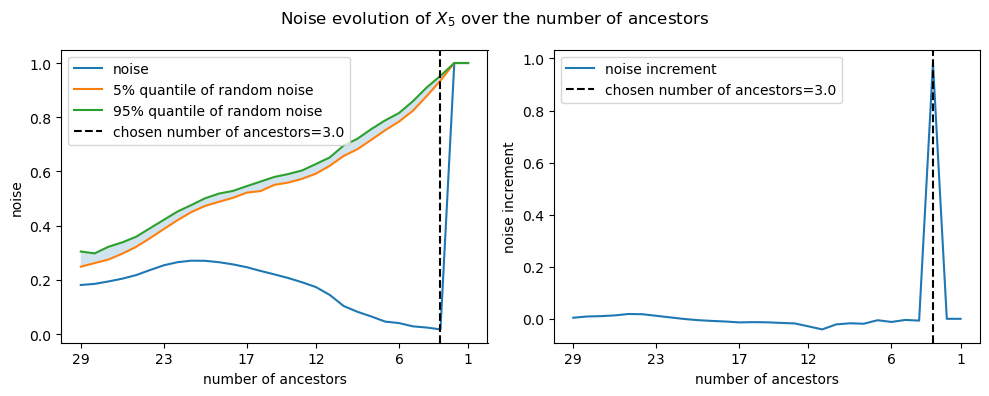


Results for $X_{6}$
Kernel [linear] has n/(n+s)=0.5521810413355986, Z=(1.00, 1.00), gamma=7.27e+00
Kernel [quadratic] has n/(n+s)=0.5925308359481333, Z=(0.94, 0.96), gamma=2.29e+00
Kernel [gaussian] has n/(n+s)=0.18088011997145415, Z=(0.25, 0.30), gamma=2.82e+08
$X_{6}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.55)
Ancestors of $X_{6}$: ['$X_{5}$', '$X_{7}$', '$\\ddot{X}_{6}$']



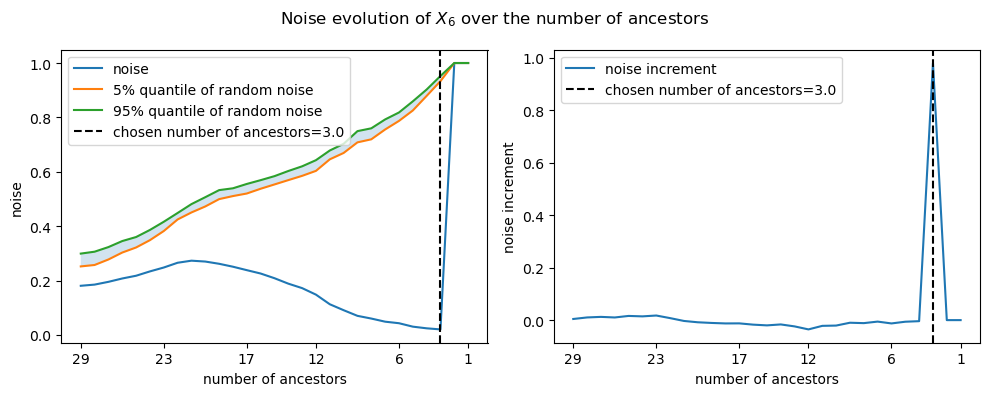


Results for $X_{7}$
Kernel [linear] has n/(n+s)=0.5608841563723184, Z=(1.00, 1.00), gamma=6.23e+00
Kernel [quadratic] has n/(n+s)=0.5959415314152416, Z=(0.94, 0.96), gamma=1.98e+00
Kernel [gaussian] has n/(n+s)=0.1804371024431603, Z=(0.25, 0.30), gamma=2.86e+08
$X_{7}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.56)
Ancestors of $X_{7}$: ['$X_{6}$', '$X_{8}$', '$\\ddot{X}_{7}$']



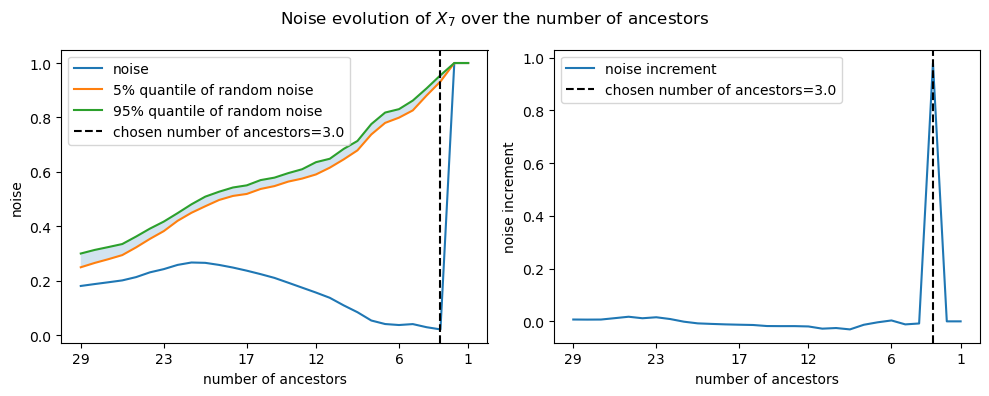


Results for $X_{8}$
Kernel [linear] has n/(n+s)=0.5194110513843111, Z=(1.00, 1.00), gamma=6.45e+00
Kernel [quadratic] has n/(n+s)=0.5315739584301117, Z=(0.94, 0.96), gamma=1.81e+00
Kernel [gaussian] has n/(n+s)=0.18286445056552164, Z=(0.25, 0.30), gamma=2.87e+08
$X_{8}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.52)
Ancestors of $X_{8}$: ['$X_{9}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']



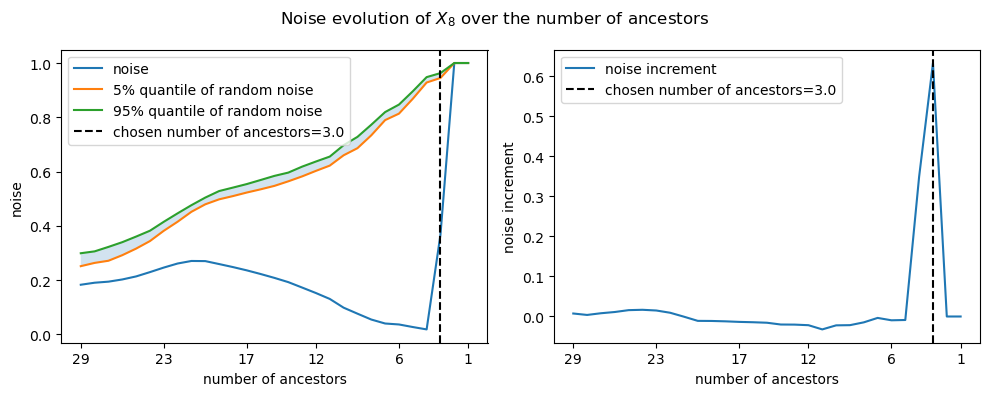


Results for $X_{9}$
Kernel [linear] has n/(n+s)=0.5702029453443259, Z=(1.00, 1.00), gamma=4.02e+00
Kernel [quadratic] has n/(n+s)=0.5914928405389502, Z=(0.95, 0.96), gamma=1.22e+00
Kernel [gaussian] has n/(n+s)=0.17976076574717278, Z=(0.25, 0.30), gamma=2.83e+08
$X_{9}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.57)
Ancestors of $X_{9}$: ['$X_{8}$', '$\\ddot{X}_{8}$', '$\\ddot{X}_{9}$']



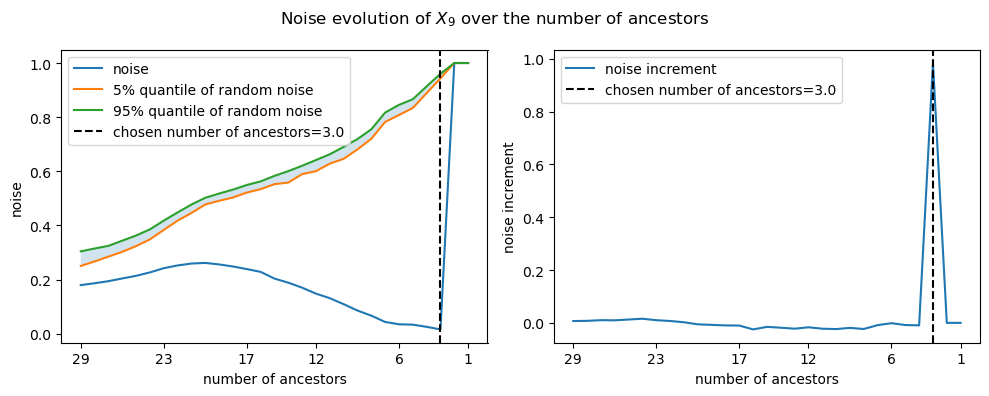


Results for $\dot{X}_{0}$
Kernel [linear] has n/(n+s)=0.8861983898371849, Z=(0.99, 1.00), gamma=5.58e+02
Kernel [quadratic] has n/(n+s)=0.8607871079776817, Z=(0.96, 0.97), gamma=3.00e+02
Kernel [gaussian] has n/(n+s)=0.20498461592066164, Z=(0.26, 0.31), gamma=2.93e+08
$\dot{X}_{0}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.89)
Ancestors of $\dot{X}_{0}$: ['$X_{2}$', '$X_{5}$', '$X_{9}$', '$\\dot{X}_{1}$']



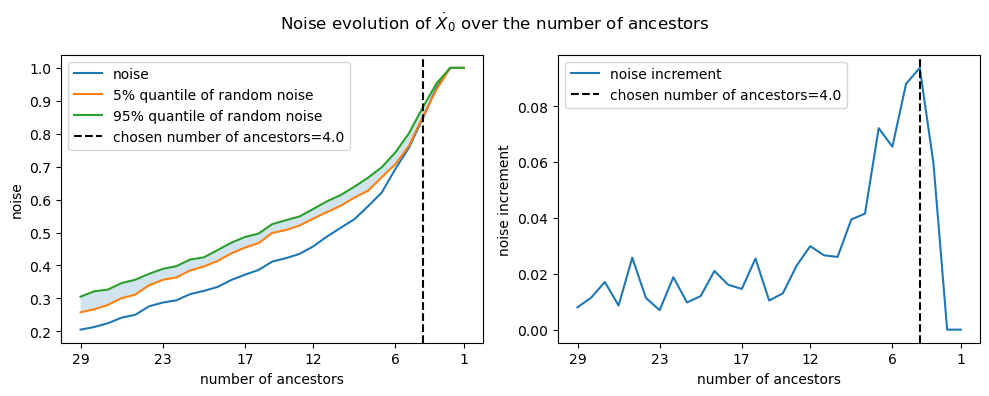


Results for $\dot{X}_{1}$
Kernel [linear] has n/(n+s)=0.807294817085284, Z=(1.00, 1.00), gamma=3.45e+02
Kernel [quadratic] has n/(n+s)=0.8060388574084327, Z=(0.96, 0.97), gamma=1.73e+02
Kernel [gaussian] has n/(n+s)=0.19418936405125437, Z=(0.26, 0.30), gamma=2.89e+08
$\dot{X}_{1}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.81)
Ancestors of $\dot{X}_{1}$: ['$X_{5}$', '$\\dot{X}_{0}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$']



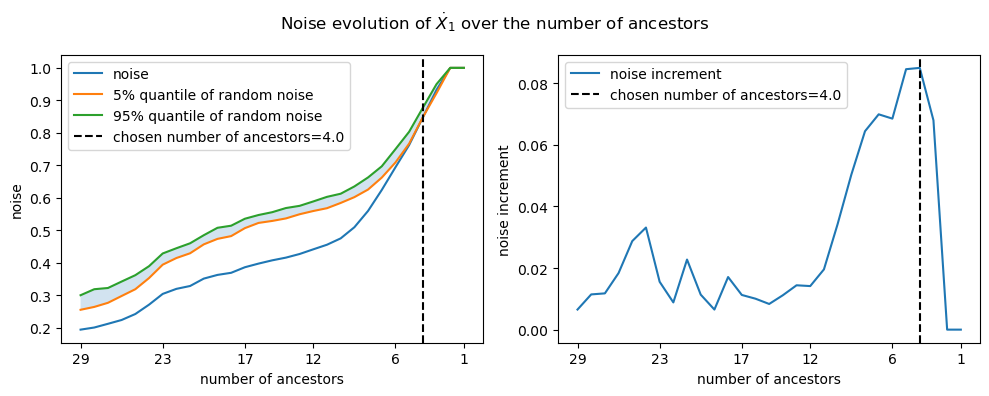


Results for $\dot{X}_{2}$
Kernel [linear] has n/(n+s)=0.7724834103589188, Z=(1.00, 1.00), gamma=3.11e+02
Kernel [quadratic] has n/(n+s)=0.7726410486426557, Z=(0.96, 0.97), gamma=1.51e+02
Kernel [gaussian] has n/(n+s)=0.19411119078296973, Z=(0.25, 0.30), gamma=2.88e+08
$\dot{X}_{2}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.77)
Ancestors of $\dot{X}_{2}$: ['$X_{5}$', '$\\dot{X}_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$']



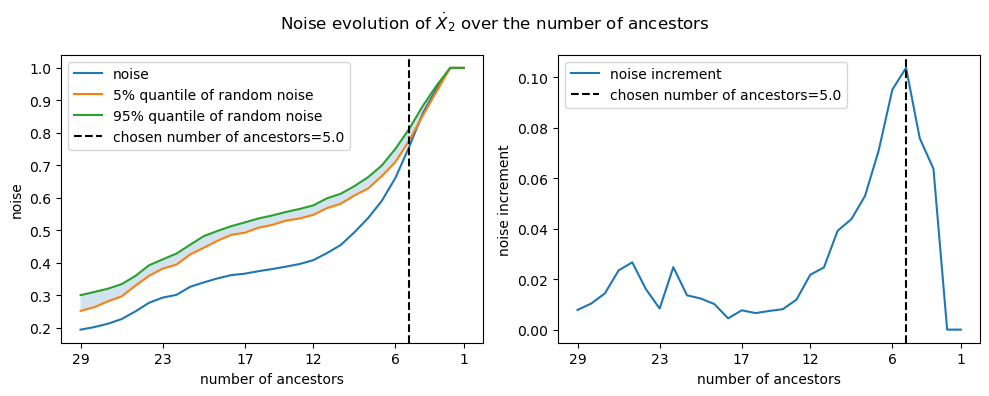


Results for $\dot{X}_{3}$
Kernel [linear] has n/(n+s)=0.7517986548504441, Z=(1.00, 1.00), gamma=2.87e+02
Kernel [quadratic] has n/(n+s)=0.7473905168879584, Z=(0.96, 0.97), gamma=1.40e+02
Kernel [gaussian] has n/(n+s)=0.19332086372968663, Z=(0.25, 0.30), gamma=2.87e+08
$\dot{X}_{3}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.75)
Ancestors of $\dot{X}_{3}$: ['$X_{0}$', '$\\dot{X}_{1}$', '$\\dot{X}_{2}$', '$\\dot{X}_{4}$', '$\\dot{X}_{5}$', '$\\ddot{X}_{2}$']



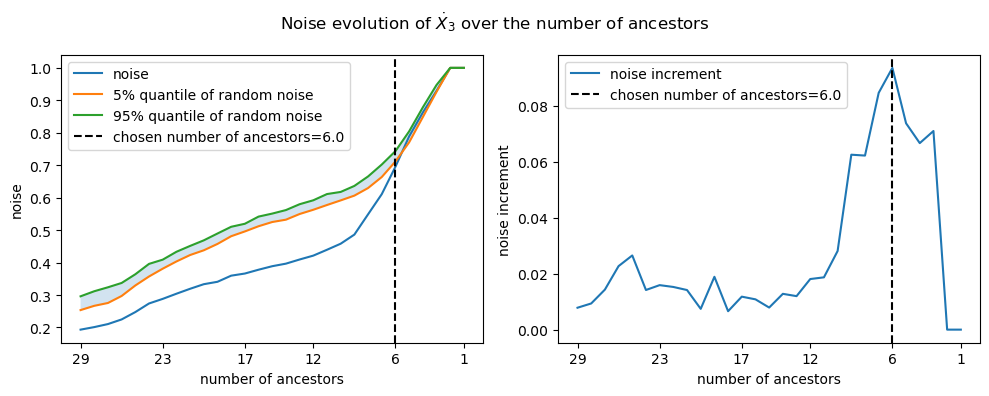


Results for $\dot{X}_{4}$
Kernel [linear] has n/(n+s)=0.7417779302255731, Z=(1.00, 1.00), gamma=2.60e+02
Kernel [quadratic] has n/(n+s)=0.7457679258129214, Z=(0.96, 0.97), gamma=1.28e+02
Kernel [gaussian] has n/(n+s)=0.1940205929790347, Z=(0.25, 0.31), gamma=2.84e+08
$\dot{X}_{4}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.74)
Ancestors of $\dot{X}_{4}$: ['$X_{5}$', '$\\dot{X}_{2}$', '$\\dot{X}_{3}$', '$\\dot{X}_{5}$', '$\\ddot{X}_{0}$']



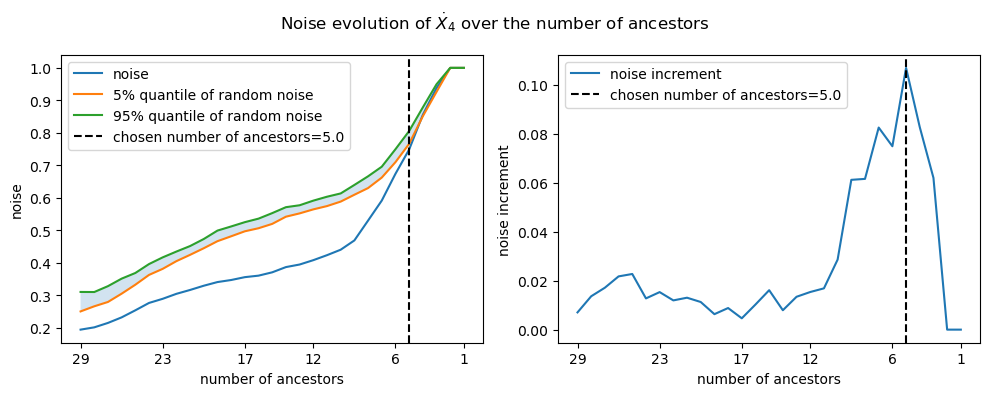


Results for $\dot{X}_{5}$
Kernel [linear] has n/(n+s)=0.7481323076611321, Z=(1.00, 1.00), gamma=2.69e+02
Kernel [quadratic] has n/(n+s)=0.7327583084797503, Z=(0.96, 0.97), gamma=1.30e+02
Kernel [gaussian] has n/(n+s)=0.19469744543612974, Z=(0.25, 0.30), gamma=2.85e+08
$\dot{X}_{5}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.75)
Ancestors of $\dot{X}_{5}$: ['$X_{6}$', '$X_{7}$', '$\\dot{X}_{3}$', '$\\dot{X}_{4}$', '$\\dot{X}_{6}$', '$\\ddot{X}_{0}$']



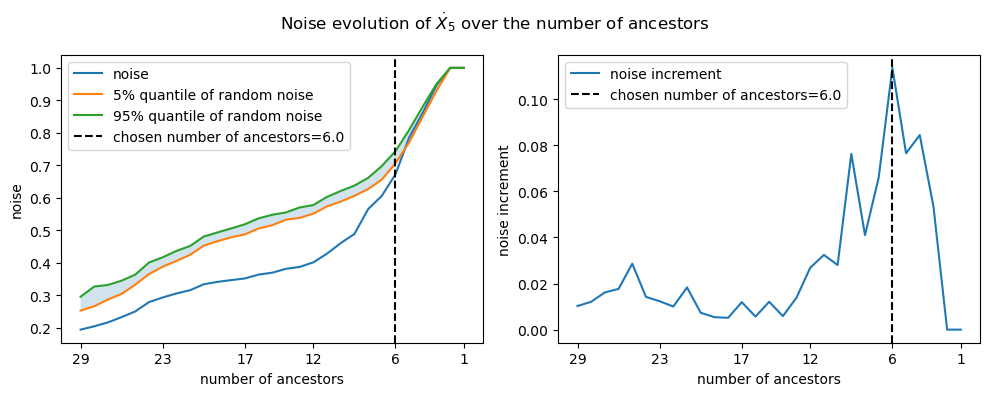


Results for $\dot{X}_{6}$
Kernel [linear] has n/(n+s)=0.7571233613141952, Z=(1.00, 1.00), gamma=2.79e+02
Kernel [quadratic] has n/(n+s)=0.7397846092299701, Z=(0.96, 0.97), gamma=1.36e+02
Kernel [gaussian] has n/(n+s)=0.19371399760286062, Z=(0.25, 0.30), gamma=2.89e+08
$\dot{X}_{6}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.76)
Ancestors of $\dot{X}_{6}$: ['$X_{2}$', '$X_{5}$', '$\\dot{X}_{5}$', '$\\dot{X}_{7}$', '$\\ddot{X}_{1}$']



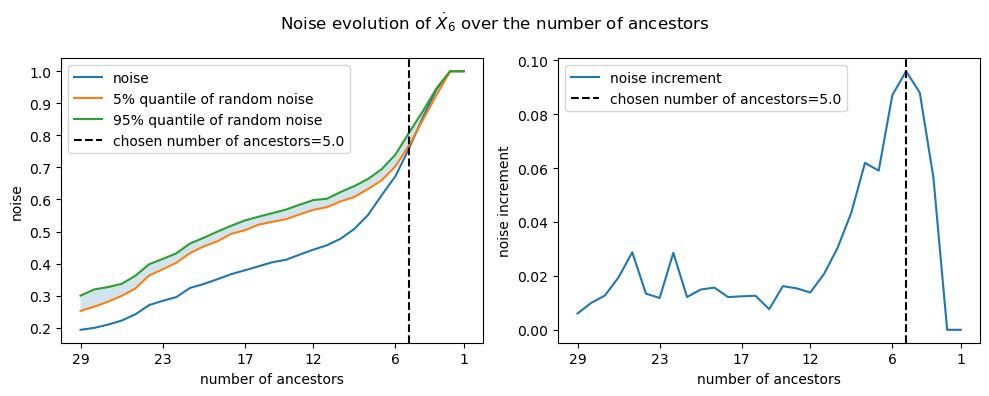


Results for $\dot{X}_{7}$
Kernel [linear] has n/(n+s)=0.7609972787807064, Z=(1.00, 1.00), gamma=2.75e+02
Kernel [quadratic] has n/(n+s)=0.7512655312977257, Z=(0.96, 0.97), gamma=1.35e+02
Kernel [gaussian] has n/(n+s)=0.1904492709388446, Z=(0.25, 0.30), gamma=2.87e+08
$\dot{X}_{7}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.76)
Ancestors of $\dot{X}_{7}$: ['$X_{2}$', '$X_{7}$', '$X_{8}$', '$\\dot{X}_{5}$', '$\\dot{X}_{6}$', '$\\dot{X}_{8}$']



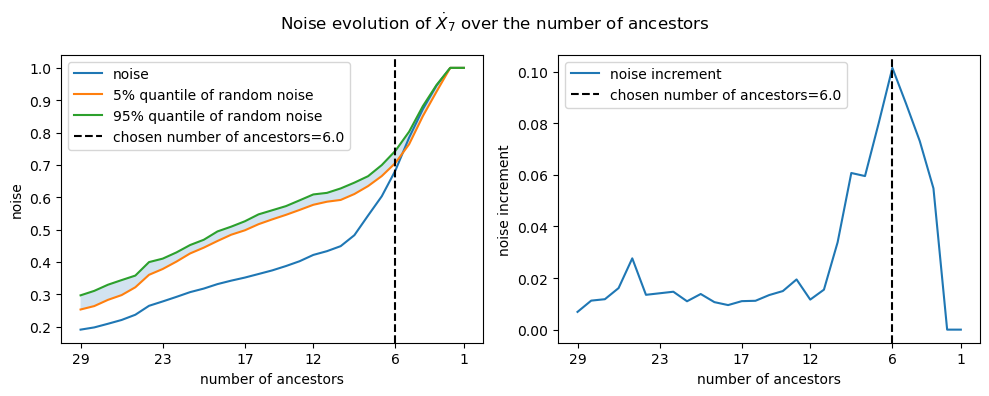


Results for $\dot{X}_{8}$
Kernel [linear] has n/(n+s)=0.7944186498783923, Z=(1.00, 1.00), gamma=3.02e+02
Kernel [quadratic] has n/(n+s)=0.7811779694203911, Z=(0.96, 0.97), gamma=1.53e+02
Kernel [gaussian] has n/(n+s)=0.190079422510827, Z=(0.25, 0.30), gamma=2.87e+08
$\dot{X}_{8}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.79)
Ancestors of $\dot{X}_{8}$: ['$X_{6}$', '$X_{8}$', '$\\dot{X}_{7}$', '$\\dot{X}_{9}$', '$\\ddot{X}_{2}$']



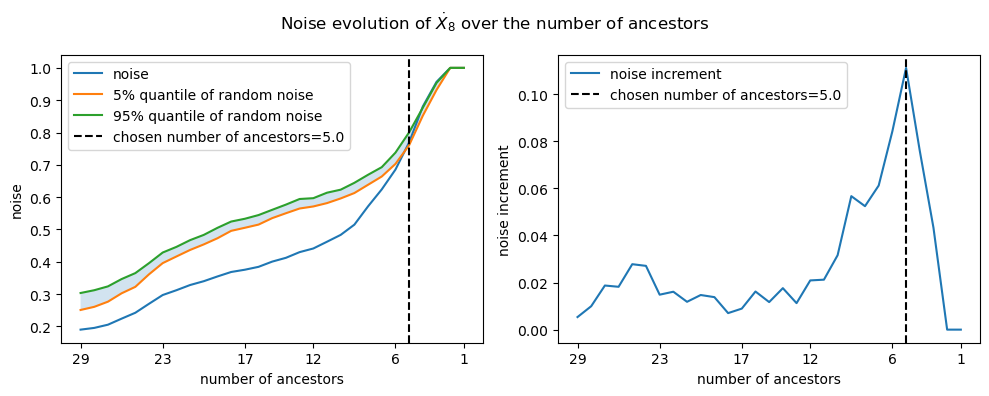


Results for $\dot{X}_{9}$
Kernel [linear] has n/(n+s)=0.8728281628522944, Z=(1.00, 1.00), gamma=5.28e+02
Kernel [quadratic] has n/(n+s)=0.8367534233753438, Z=(0.96, 0.97), gamma=2.81e+02
Kernel [gaussian] has n/(n+s)=0.19853972488619628, Z=(0.25, 0.30), gamma=2.87e+08
$\dot{X}_{9}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.87)
Ancestors of $\dot{X}_{9}$: ['$X_{0}$', '$X_{4}$', '$X_{9}$', '$\\dot{X}_{2}$', '$\\dot{X}_{7}$', '$\\dot{X}_{8}$']



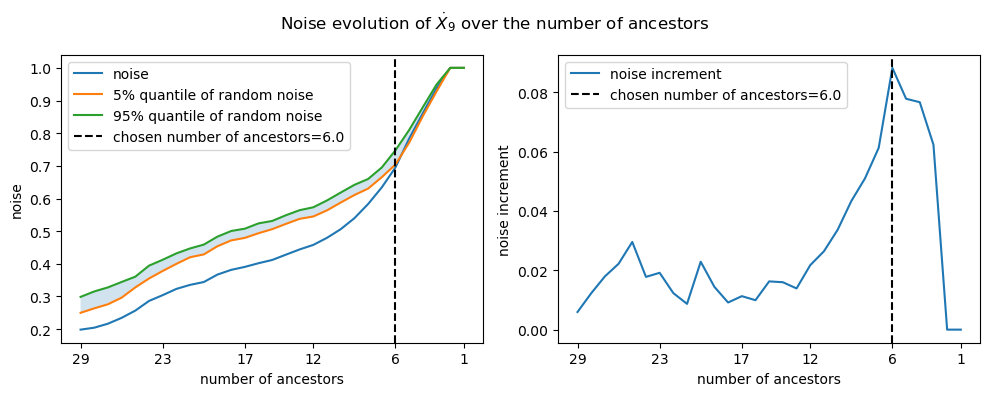


Results for $\ddot{X}_{0}$
Kernel [linear] has n/(n+s)=0.7202112296884599, Z=(1.00, 1.00), gamma=3.75e+00
Kernel [quadratic] has n/(n+s)=0.7088391677112735, Z=(0.95, 0.96), gamma=1.28e+00
Kernel [gaussian] has n/(n+s)=0.16978385865641152, Z=(0.25, 0.30), gamma=2.84e+08
$\ddot{X}_{0}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.72)
Ancestors of $\ddot{X}_{0}$: ['$X_{0}$', '$X_{1}$', '$\\ddot{X}_{1}$']



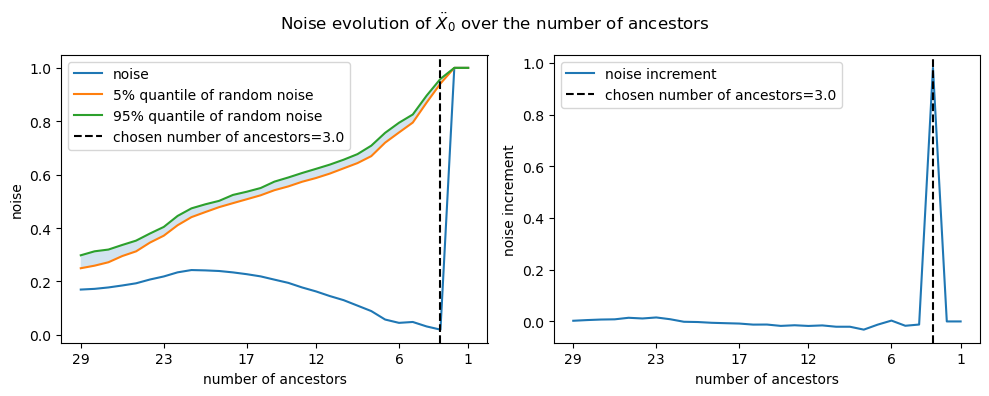


Results for $\ddot{X}_{1}$
Kernel [linear] has n/(n+s)=0.7734809144778246, Z=(1.00, 1.00), gamma=9.57e+00
Kernel [quadratic] has n/(n+s)=0.7573507221575089, Z=(0.94, 0.96), gamma=3.40e+00
Kernel [gaussian] has n/(n+s)=0.16703142814934765, Z=(0.25, 0.30), gamma=2.81e+08
$\ddot{X}_{1}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.77)
Ancestors of $\ddot{X}_{1}$: ['$X_{1}$', '$X_{2}$', '$\\ddot{X}_{0}$']



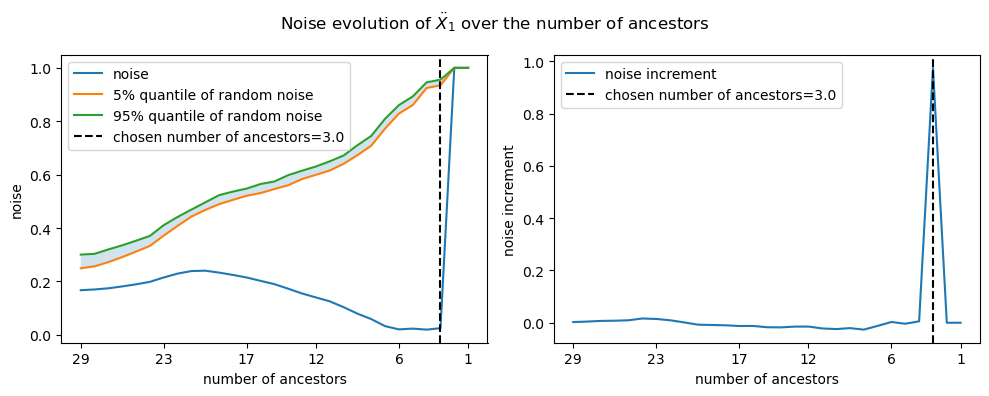


Results for $\ddot{X}_{2}$
Kernel [linear] has n/(n+s)=0.7288635766820577, Z=(1.00, 1.00), gamma=8.02e+00
Kernel [quadratic] has n/(n+s)=0.7110660725601344, Z=(0.94, 0.96), gamma=3.05e+00
Kernel [gaussian] has n/(n+s)=0.16913414417640515, Z=(0.25, 0.30), gamma=2.79e+08
$\ddot{X}_{2}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.73)
Ancestors of $\ddot{X}_{2}$: ['$X_{1}$', '$X_{2}$', '$X_{3}$']



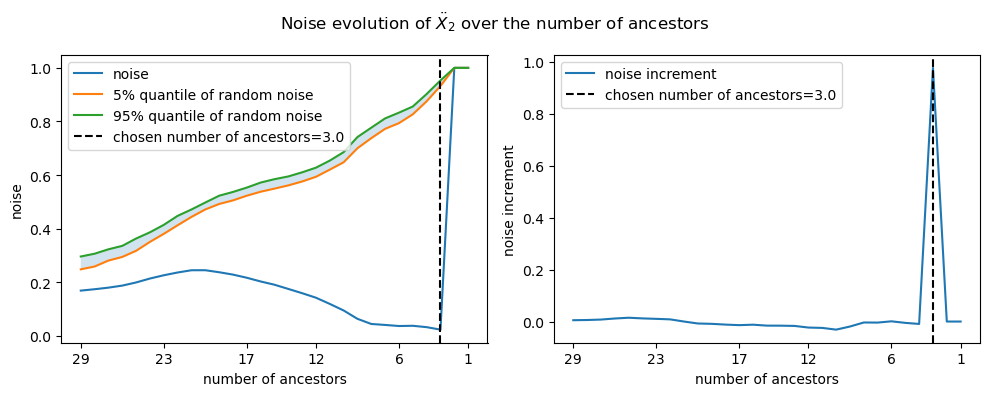


Results for $\ddot{X}_{3}$
Kernel [linear] has n/(n+s)=0.7188352528595625, Z=(1.00, 1.00), gamma=6.54e+00
Kernel [quadratic] has n/(n+s)=0.7074946770521312, Z=(0.94, 0.96), gamma=2.74e+00
Kernel [gaussian] has n/(n+s)=0.17144004781942127, Z=(0.25, 0.30), gamma=2.81e+08
$\ddot{X}_{3}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.72)
Ancestors of $\ddot{X}_{3}$: ['$X_{2}$', '$X_{3}$', '$X_{4}$']



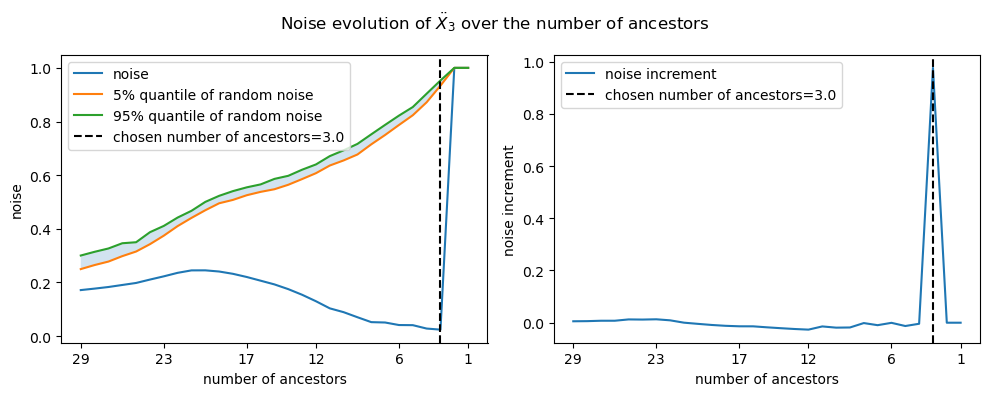


Results for $\ddot{X}_{4}$
Kernel [linear] has n/(n+s)=0.7446406596596812, Z=(1.00, 1.00), gamma=1.02e+01
Kernel [quadratic] has n/(n+s)=0.7253901851176685, Z=(0.94, 0.96), gamma=3.89e+00
Kernel [gaussian] has n/(n+s)=0.1731443919777903, Z=(0.25, 0.31), gamma=2.84e+08
$\ddot{X}_{4}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.74)
Ancestors of $\ddot{X}_{4}$: ['$X_{3}$', '$X_{4}$', '$X_{5}$']



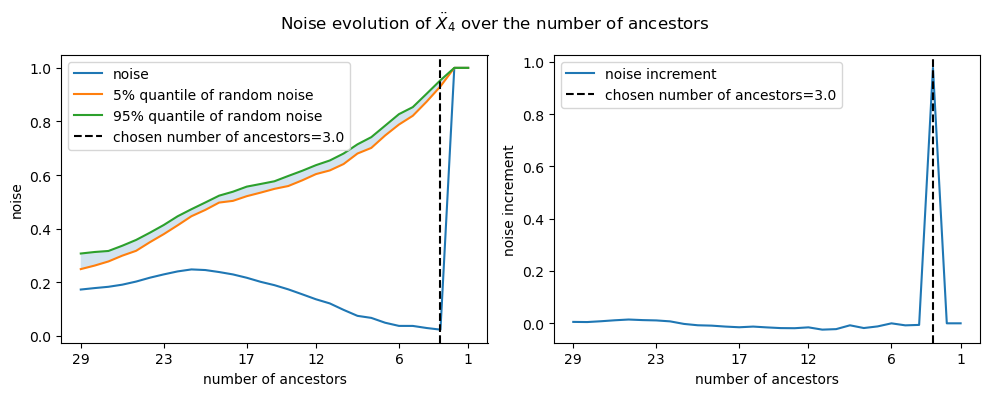


Results for $\ddot{X}_{5}$
Kernel [linear] has n/(n+s)=0.7481424272952211, Z=(1.00, 1.00), gamma=7.28e+00
Kernel [quadratic] has n/(n+s)=0.7195803777595967, Z=(0.94, 0.96), gamma=2.44e+00
Kernel [gaussian] has n/(n+s)=0.16813483214655944, Z=(0.25, 0.30), gamma=2.80e+08
$\ddot{X}_{5}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.75)
Ancestors of $\ddot{X}_{5}$: ['$X_{4}$', '$X_{5}$', '$X_{6}$']



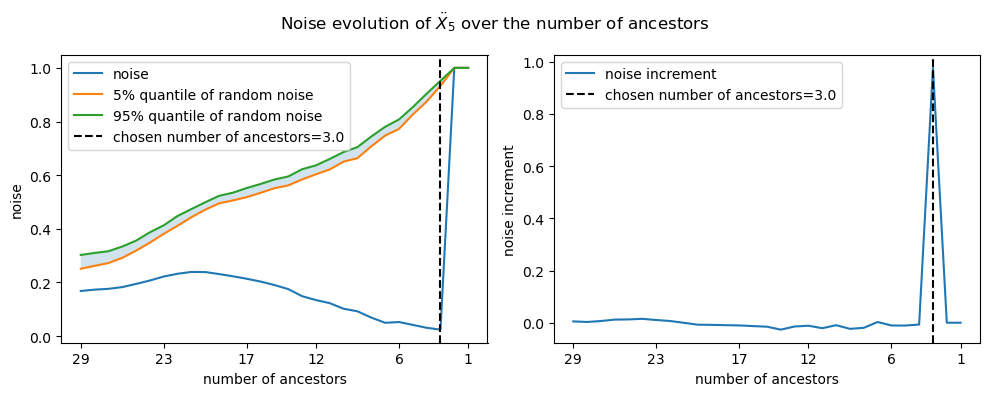


Results for $\ddot{X}_{6}$
Kernel [linear] has n/(n+s)=0.7492646865297901, Z=(1.00, 1.00), gamma=7.99e+00
Kernel [quadratic] has n/(n+s)=0.7289290313941097, Z=(0.94, 0.96), gamma=2.86e+00
Kernel [gaussian] has n/(n+s)=0.16866431190172018, Z=(0.25, 0.30), gamma=2.80e+08
$\ddot{X}_{6}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.75)
Ancestors of $\ddot{X}_{6}$: ['$X_{5}$', '$X_{6}$', '$X_{7}$']



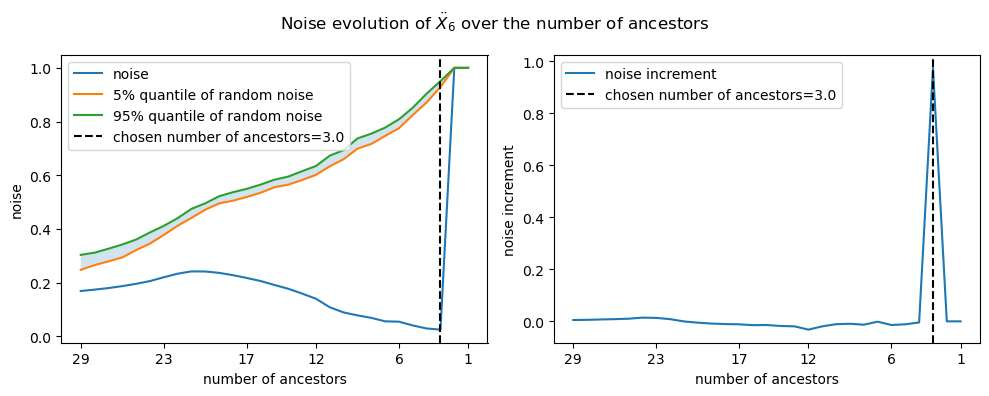


Results for $\ddot{X}_{7}$
Kernel [linear] has n/(n+s)=0.7378738614399647, Z=(1.00, 1.00), gamma=6.35e+00
Kernel [quadratic] has n/(n+s)=0.704367244644096, Z=(0.94, 0.96), gamma=2.16e+00
Kernel [gaussian] has n/(n+s)=0.16933475147519905, Z=(0.25, 0.30), gamma=2.85e+08
$\ddot{X}_{7}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.74)
Ancestors of $\ddot{X}_{7}$: ['$X_{6}$', '$X_{7}$', '$X_{8}$']



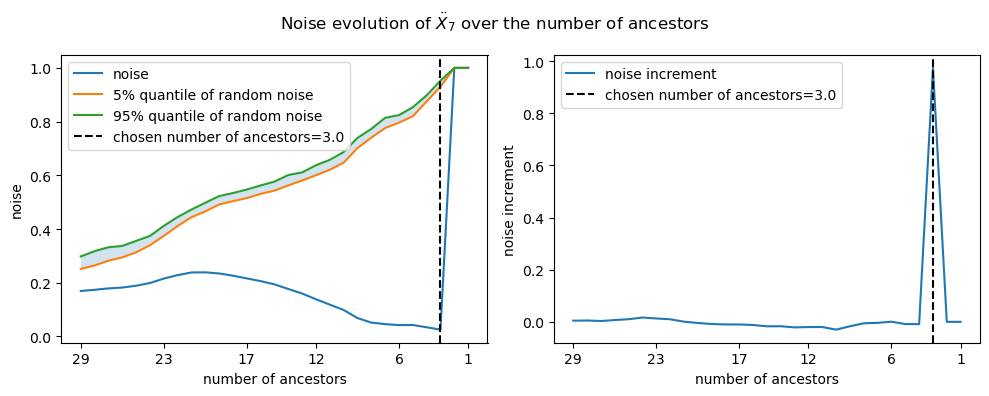


Results for $\ddot{X}_{8}$
Kernel [linear] has n/(n+s)=0.7861619265220101, Z=(1.00, 1.00), gamma=8.24e+00
Kernel [quadratic] has n/(n+s)=0.7620452091787788, Z=(0.94, 0.96), gamma=2.94e+00
Kernel [gaussian] has n/(n+s)=0.16891912908847026, Z=(0.25, 0.30), gamma=2.84e+08
$\ddot{X}_{8}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.79)
Ancestors of $\ddot{X}_{8}$: ['$X_{7}$', '$X_{8}$', '$\\ddot{X}_{9}$']



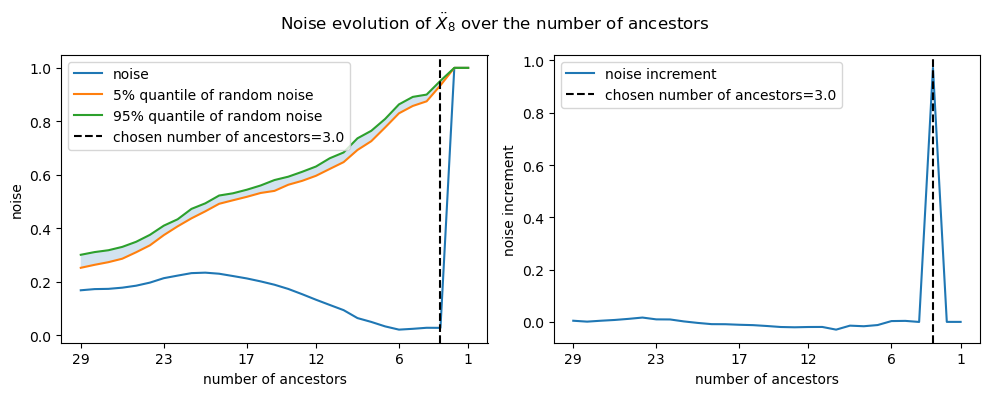


Results for $\ddot{X}_{9}$
Kernel [linear] has n/(n+s)=0.7009500807394811, Z=(1.00, 1.00), gamma=3.32e+00
Kernel [quadratic] has n/(n+s)=0.6919175069911657, Z=(0.95, 0.96), gamma=1.07e+00
Kernel [gaussian] has n/(n+s)=0.17229064545929207, Z=(0.25, 0.30), gamma=2.82e+08
$\ddot{X}_{9}$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.70)
Ancestors of $\ddot{X}_{9}$: ['$X_{8}$', '$X_{9}$', '$\\ddot{X}_{8}$']



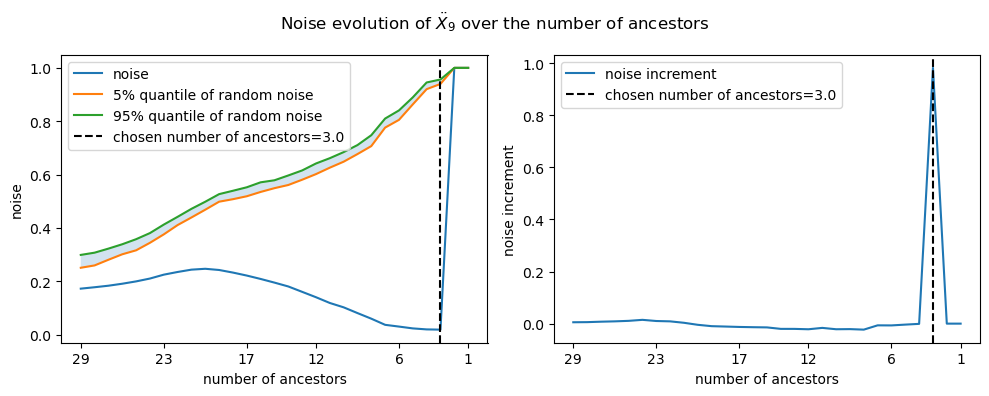

In [78]:
graph_discovery_non_linear.fit()

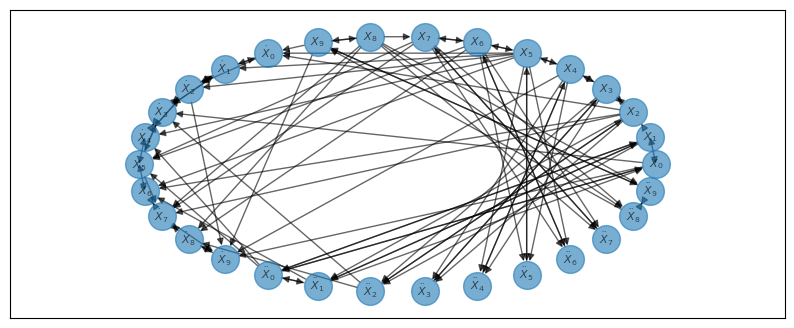

In [50]:
graph_discovery_non_linear.plot_graph(type_label=False)

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1549691/56301188.py:11: SyntaxWarning: invalid escape sequence '\d'
  G2=nx.subgraph(graph_discovery_non_linear.G,[x for x in graph_discovery.G.nodes() if '\dot' not in x])


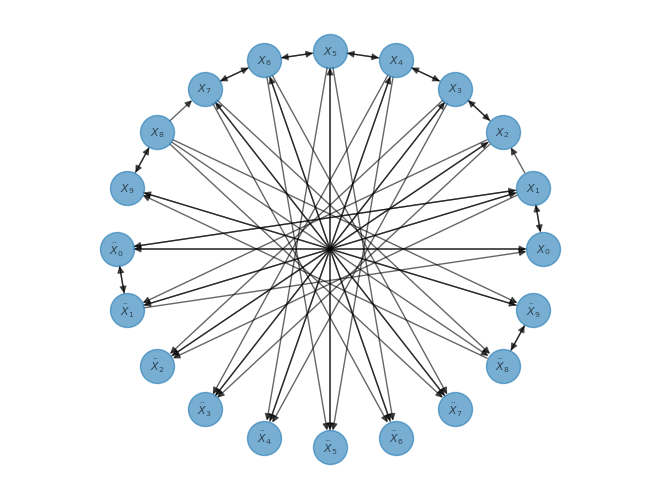

In [51]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)
G2=nx.subgraph(graph_discovery_non_linear.G,[x for x in graph_discovery.G.nodes() if '\dot' not in x])
plot_a_network(G2,type_label=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1549691/2000600593.py:1: SyntaxWarning: invalid escape sequence '\d'
  plot_a_network(nx.ego_graph(G2.reverse(),'$\ddot{X}_{1}$',undirected=False,radius=1).reverse(),type_label=True)


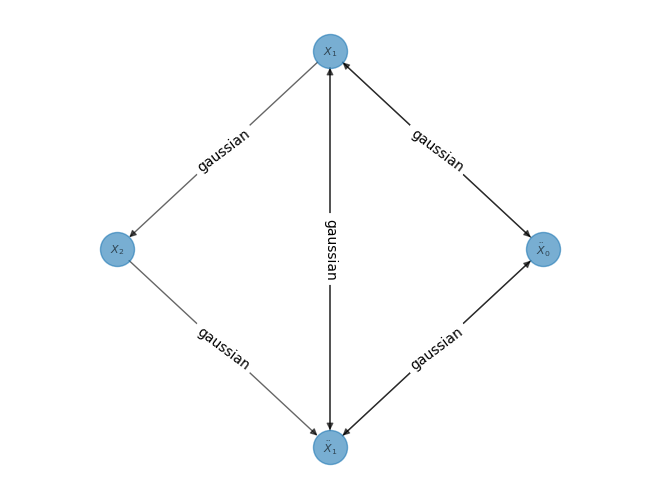

In [52]:
plot_a_network(nx.ego_graph(G2.reverse(),'$\ddot{X}_{1}$',undirected=False,radius=1).reverse(),type_label=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1549691/1177259404.py:1: SyntaxWarning: invalid escape sequence '\d'
  plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'$\dot{X}_{5}$',undirected=False,radius=1).reverse(),type_label=False)


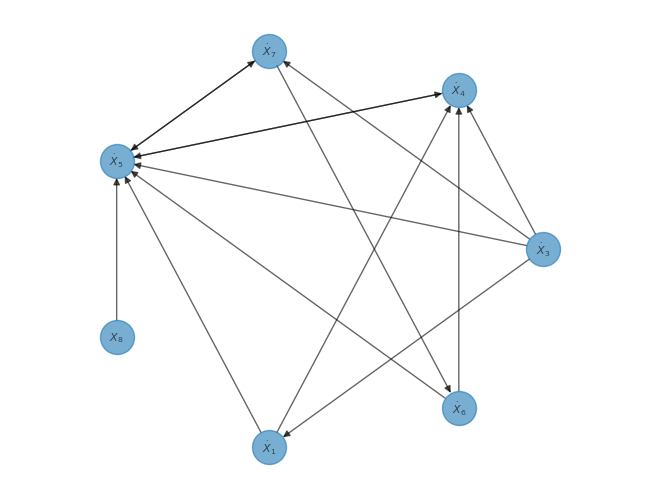

In [53]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'$\dot{X}_{5}$',undirected=False,radius=1).reverse(),type_label=False)